# Evaluación de modelos

- Después de haber discutido los fundamentos del `aprendizaje supervisado` y de sus `algoritmos`, nos adentraremos en la `evaluación de los modelos` y en la `selección de los parámetros`. Nos centraremos en los modelos supervisados, la `regresión` y la `clasificación`, ya que la evaluación y selección de modelos en el aprendizaje no supervisado suele ser un proceso muy cualitativo.

- Para evaluar nuestros modelos supervisados, hasta ahora hemos dividido nuestro conjunto de datos en un conjunto de `entrenamiento` y un conjunto de `prueba` utilizando la función `train_test_split`, hemos construido un modelo en el conjunto de entrenamiento llamando al método `fit`, y lo hemos evaluado en el conjunto de `prueba` utilizando el método `score`, que para la clasificación, calcula la `fracción de muestras correctamente clasificadas`. He aquí
un ejemplo de este proceso

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

- Creamos un conjunto de datos sintéticos

In [3]:
X, y = make_blobs(random_state=0)

- Dividimos los datos y las etiquetas en un conjunto de entrenamiento y otro de prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

- Instanciar el modelo y ajustarlo al conjunto de entrenamiento

In [5]:
logreg = LogisticRegression().fit(X_train, y_train)

- Evaluar el modelo en el conjunto de prueba

In [6]:
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


- Evaluar el modelo en el conjunto de entrenamiento

In [7]:
print("Train set score: {:.2f}".format(logreg.score(X_train, y_train)))

Train set score: 0.91


- Recuerde que la razón por la que dividimos nuestros datos en conjuntos de entrenamiento y de prueba, es que estamos interesados en medir lo bien que nuestro modelo se generaliza a nuevos datos no vistos anteriormente. `No nos interesa lo bien que nuestro modelo se ajusta al conjunto de entrenamiento, sino lo bien que puede hacer predicciones sobre datos no observados durante el entrenamiento`.

- En esta sección, ampliaremos dos aspectos de esta evaluación. En primer lugar, introduciremos la `validación cruzada` (cross-validation), una forma más sólida de `evaluar el rendimiento de la generalización`, y discutiremos los métodos para `evaluar el rendimiento de la clasificación y la regresión` que van más allá de las medidas por defecto de `precisión (accuracy)` y $R^2$ proporcionadas por el método `score`. También hablaremos del `grid search`, un método eficaz para ajustar los parámetros de los modelos supervisados y obtener el `mejor rendimiento de la generalización`.

## Cross-Validation

- La `validación cruzada (cross-validation)` es un `método estadístico` para evaluar el rendimiento de la generalización que es `más estable y exhaustivo` que el uso de una división en un conjunto de entrenamiento y otro de prueba. En la validación cruzada, `los datos se dividen repetidamente y se entrenan múltiples modelos`. La versión más utilizada de la validación cruzada es la `k-fold cross-validation`, donde `k` es un número `especificado por el usuario, normalmente 5 o 10`. 

- `Cuando se realiza la validación cruzada five-fold, los datos se dividen primero en cinco partes de tamaño (aproximadamente) igual, llamadas pliegues (folds)`. A continuación, se entrena una secuencia de modelos. `El primer modelo se entrena utilizando el primer pliegue como conjunto de prueba, y los pliegues restantes (2-5) se utilizan como conjunto de entrenamiento. El modelo se construye utilizando los datos de los pliegues 2-5, y luego se evalúa accuracy en el pliegue 1`. A continuación, luego se construye otro modelo, esta vez utilizando el pliegue 2 como conjunto de prueba y los datos de los pliegues 1, 3, 4 y 5 como conjunto de entrenamiento. Este proceso se repite utilizando los pliegues 3, 4 y 5 como conjuntos de prueba. `Para cada una de estas cinco divisiones de los datos en conjuntos de entrenamiento y de prueba, calculamos la accuracy`. Al final, hemos recogido cinco valores de `accuracy`.

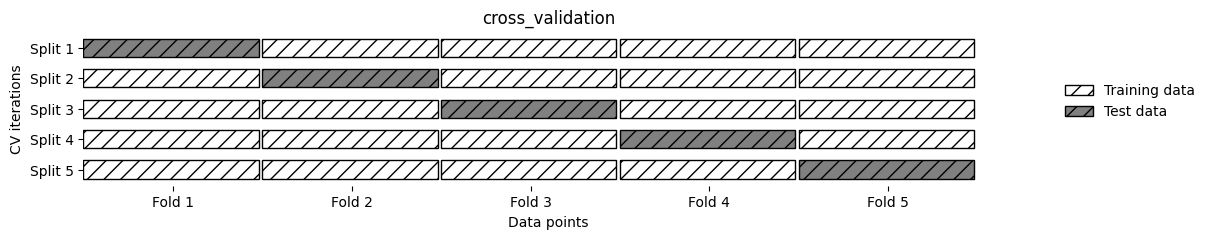

In [8]:
import mglearn
mglearn.plots.plot_cross_validation()

- Normalmente, la primera quinta parte de los datos es conocida como el `primer fold`, la segunda quinta parte de los datos es el
`segundo fold`, y así sucesivamente.

### Validación cruzada en scikit-learn

- La validación cruzada se implementa en `scikit-learn` utilizando la función `cross_val_score` del módulo `model_selection`. `Los parámetros de la función cross_val_score son, el modelo que queremos evaluar, los datos de entrenamiento y las etiquetas reales`. Vamos a evaluar `LogisticRegression` en el conjunto de datos `iris`. Utilizaremos los parámetros por defecto de este modelo, mas adelante estudiaremos como conseguir los mas óptimos por medio de `grid-search`, por ahora solo estamos interesados en evaluar el modelo por defecto usando `cross_val_score`. Para mas información acerca de los argumentos del modelo (ver [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [10]:
iris = load_iris()
logreg = LogisticRegression()

In [11]:
scores = cross_val_score(logreg, iris.data, iris.target);
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


- Por defecto, `cross_val_score` realiza una `five-fold cross validation`, devolviendo cinco valores de `accuracy`. Podemos cambiar el número de pliegues `(folds)` utilizados, cambiando el parámetro `cv`:

In [12]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10);
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


- Una forma habitual de `resumir la precisión de la validación cruzada es calcular la media`

In [13]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


- Utilizando la `validación cruzada media` podemos concluir que, esperamos que el modelo sea de precisión en torno al 97% de media. Si observamos las cinco puntuaciones producidas por la validación cruzada de cinco pliegues `five-fold cross validation`, también podemos concluir que hay una varianza relativamente alta en la precisión entre pliegues, que va del 100% de precisión al 93.33% de precisión aproximadamente. Esto podría implicar que el modelo es muy `dependiente de los pliegues particulares utilizados para el entrenamiento`, pero también podría ser simplemente una `consecuencia del pequeño tamaño del conjunto de datos`.

### Ventajas de la validación cruzada

- Son varios los beneficios de utilizar la `validación cruzada` en lugar de una única división en un conjunto de entrenamiento y otro de prueba. En primer lugar, recuerde que `train_test_split` realiza una división aleatoria de los datos. Imaginemos que `tenemos "suerte" al dividir aleatoriamente los datos, y todos los ejemplos que son difíciles de clasificar acaban en el conjunto de entrenamiento`. En ese caso, `el conjunto de prueba sólo contendrá ejemplos "fáciles", y nuestra precisión en el conjunto de prueba será irrealmente alto`. Por el contrario, `si tenemos "mala suerte", es posible que pongamos al azar todos los ejemplos difíciles de clasificar en el conjunto de prueba y en consecuencia, obtener una scoring irrealmente baja`.

- Sin embargo, al utilizar la validación cruzada, cada ejemplo estará en el conjunto de entrenamiento exactamente una vez: cada ejemplo está en uno de los pliegues (`folds`), y cada pliegue es el conjunto de prueba una vez. Por lo tanto, `el modelo tiene que generalizar bien a todas las muestras del conjunto de datos, para que todas las validaciones cruzadas (y su media) sean altas`. El hecho de `tener múltiples divisiones de los datos también proporciona cierta información sobre la sensibilidad de nuestro modelo a la selección a la selección del conjunto de datos de entrenamiento`. 

- En el caso del conjunto de datos `iris`, vimos precisiones de entre el 93.33% y el 100%. `Se trata de un rango bastante amplio que nos da una idea de cómo podría funcionar el modelo en el peor y el mejor de los casos, cuando se aplica a nuevos datos`. Otro beneficio de la validación cruzada en comparación con el uso de una única división de los datos es que utilizamos nuestros datos de forma más eficaz. Al utilizar `train_test_split`, solemos utilizar `75% de los datos para el entrenamiento y 25% de los datos para la evaluación`. Cuando se utiliza la validación cruzada de cinco pliegues (`five-fold`), en cada iteración podemos utilizar `cuatro quintos de los datos (80%) para ajustar el modelo`. Cuando se utiliza la validación cruzada de 10 pliegues, podemos utilizar `nueve décimas partes de los datos (90%)` para ajustar el modelo. Un `mayor número de datos suele dar lugar a modelos más precisos`. La principal `desventaja de la validación cruzada es el aumento del coste computacional`. Como ahora `estamos entrenando k modelos en lugar de un único modelo`, la validación cruzada será aproximadamente `k` veces más lenta que hacer una única división de los datos.

```{admonition} Observación
:class: tip

Es importante tener en cuenta que la `validación cruzada no es una forma de construir un modelo que pueda aplicarse a nuevos datos. La validación cruzada no devuelve un modelo`. Cuando se llama a `cross_validation_score`, se construyen internamente múltiples modelos, pero el propósito de la validación cruzada es `evaluar lo bien que un algoritmo determinado generalizará cuando es entrenado en un conjunto de datos específico`.
```

### Validación cruzada estratificada $k$-fold y otras estrategias

- Dividir el conjunto de datos en `k pliegues` comenzando por la primera parte de los datos, como descrito en la sección anterior, `puede no ser siempre una buena idea`. Por ejemplo, veamos el conjunto de datos `iris`

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- Nótese que `el primer tercio de los datos corresponde a la clase 0, el segundo tercio a la clase 1 y el último tercio a la clase 2`. Imagine que realiza una validación cruzada `3-fold` en este conjunto de datos. El primer pliegue sería sólo la clase 0, por lo que en la primera división de los datos, el conjunto de prueba sería sólo la clase 0, y el conjunto de entrenamiento sería sólo las clases 1 y 2. `Como las clases en el entrenamiento y la prueba serían diferentes en las tres divisiones, la precisión de la validación cruzada de tres pliegues sería cero en este conjunto de datos`. Esto no es muy útil, ya que podemos obtener una precisión mucho mejor que el 0% en el dataset `iris`.

- Como la estrategia simple de `k-fold` falla aquí, `scikit-learn no la utiliza para clasificación, sino que utiliza la validación cruzada estratificada k-fold`. En la validación cruzada estratificada, dividimos los datos de forma que las `proporciones entre las clases sean las mismas en cada pliegue como en todo el conjunto de datos`.

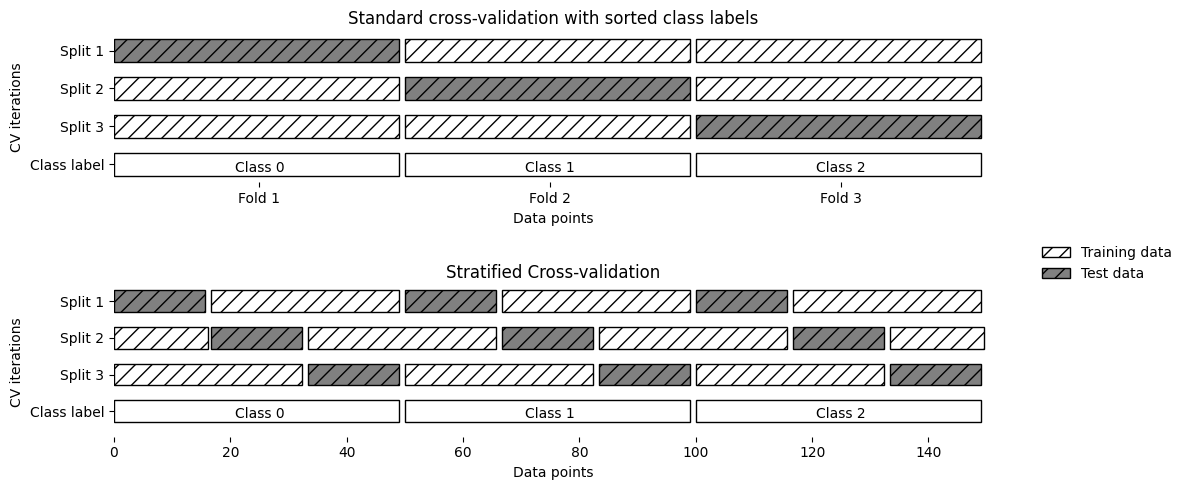

In [15]:
mglearn.plots.plot_stratified_cross_validation()

- `Por ejemplo, si el 90% de las muestras pertenecen a la clase A y el 10% de las muestras pertenecen a la clase B, entonces la validación cruzada estratificada garantiza que en cada pliegue, el 90% de las muestras pertenezcan a la clase A y el 10% de las muestras pertenezcan a la clase B`. Suele ser una buena idea utilizar la validación cruzada estratificada de `k` pliegues en lugar de la validación cruzada de `k` pliegues para evaluar un clasificador, porque da lugar a `estimaciones más fiables del rendimiento de la generalización`. En el caso de que sólo el 10% de las muestras pertenezcan a la clase B utilizando la validación cruzada `k-fold` estándar, podría ocurrir fácilmente que un pliegue sólo contuviera muestras de la clase A. El uso de este pliegue como conjunto de prueba no sería muy informativo sobre el rendimiento general del clasificador.

- Para la regresión, `scikit-learn` utiliza la validación cruzada `k-fold` estándar por defecto. Sería posible también tratar de hacer cada pliegue representativo de los diferentes valores objetivo de la regresión, pero esta no es una estrategia comúnmente utilizada. En el curso `Time Series Forecasting` analizaremos este tipo de validación cruzada.

### Más control sobre la validación cruzada

- Hemos visto antes que podemos ajustar el número de pliegues que utiliza `cross_val_score` utilizando el parámetro `cv`. Sin embargo, `scikit-learn` permite un control mucho más fino sobre lo que sucede durante la división de los datos, proporcionando un divisor de validación cruzada como parámetro `cv`. `Para la mayoría de los casos de uso, los valores predeterminados de validación cruzada k-fold para la regresión y la validación estratificada funcionan bien, pero hay algunos casos en los que una estrategia diferente se podría querer utilizar`. 

- Digamos, por ejemplo, que queremos utilizar la validación cruzada `k-fold` estándar en un conjunto de datos de clasificación para `reproducir los resultados de otra persona`. Para ello, primero tenemos que importar la clase `KFold splitter` del módulo `model_selection` e instanciarla con el número de pliegues que queremos utilizar.

In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

- Entonces, podemos pasar el objeto `kfold splitter` como el parámetro `cv` a `cross_val_score`:

In [17]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


- De este modo, podemos comprobar que, efectivamente, es una muy `mala idea utilizar la validación cruzada triple (no estratificada)` en el conjunto de datos `iris`. Recuerde que cada pliegue corresponde a una de las clases del conjunto de datos `iris`, por lo que no se puede aprender nada. Otra forma de resolver este problema es `aleatorizar los datos en lugar de estratificar los pliegues`, para eliminar la ordenación de las muestras por etiquetas. Si `shuffle es True, primero se aleatorizan todos los datos y luego se dividen en los k-folds`. 
 
- Podemos hacerlo estableciendo el parámetro `shuffle` de `KFold` en `True`. Si aleatorizamos los datos, tenemos también que fijar el `random_state` para conseguir una aleatoriedad reproducible. De lo contrario, cada ejecución de `cross_val_score` daría un resultado diferente, ya que cada vez se utilizaría una división distinta. Aleatorizar los datos antes de dividirlos produce un resultado mucho mejor

In [18]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


### Validación cruzada con exclusión (leave-one-out)

- Otro método de validación cruzada que se utiliza con frecuencia es el `leave-one-out`. Se puede pensar en la validación cruzada de exclusión como una `validación cruzada de k pliegues en la que cada pliegue es una sola muestra`. `Para cada pliegue, se elige un único punto de datos que será el conjunto de prueba`. Esto puede consumir mucho tiempo, sobre todo para conjuntos de datos grandes, pero a veces proporciona mejores estimaciones en conjuntos de datos pequeños.

In [19]:
from sklearn.model_selection import LeaveOneOut

In [20]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


### Validación cruzada aleatoria y dividida

- Otra estrategia muy flexible para la validación cruzada es `la validación cruzada aleatoria (shuffle-split cross-validation`). En la validación cruzada de división aleatoria, cada división (split) está compuesta de tanto `train_size puntos (disyuntos)` para el conjunto de entrenamiento y tantos `test_size puntos (disjuntos)` para el conjunto de prueba, se fijen inicialmente. 

- Esta división se repite `n_iter` veces, de forma aleatoria. `Para la ejecución de cuatro iteraciones de división de un conjunto de datos que consta de 10 puntos, con un conjunto de entrenamiento de 5 puntos y conjuntos de prueba de 2 puntos cada uno` (puede usar enteros para `train_size` y `test_size` para asignarles sus tamaños absolutos, o números de tipo flotante para usar fracciones del conjunto de datos)

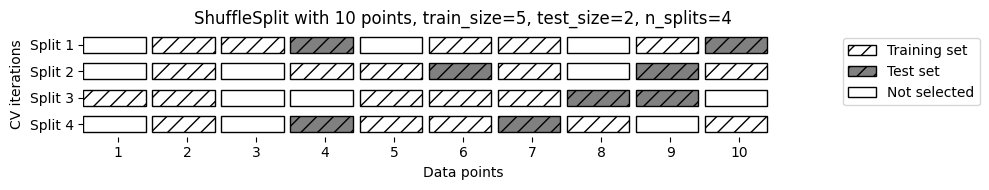

In [21]:
mglearn.plots.plot_shuffle_split()

- El siguiente código divide el conjunto de datos en un `50% de entrenamiento y un 50% de prueba para 10 iteraciones`

In [22]:
from sklearn.model_selection import ShuffleSplit

In [23]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.97333333 0.92       0.92       0.97333333 0.94666667 0.93333333
 0.96       0.96       0.96       0.96      ]


- `La validación cruzada aleatoria permite controlar el número de iteraciones independientemente del tamaño del entrenamiento y de la prueba, lo que a veces puede ser útil`. También permite solamente usar parte de los datos en cada iteración, proporcionando `train_size` y `test_size` que no suman uno. El submuestreo de los datos de esta manera puede ser `útil para experimentar con grandes conjuntos de datos`. También existe una variante estratificada de `ShuffleSplit`, llamada `StratifiedShuffleSplit`, que puede proporcionar resultados más fiables para las tareas de clasificación.

### Validación cruzada con grupos

``````{admonition} GroupKFold
- Digamos que quieres construir un sistema para `reconocer emociones a partir de imágenes de rostros (o imágenes médicas)`, y se recopila un conjunto de datos con imágenes de 100 personas, donde cada persona es capturada varias veces, mostrando varias emociones. El objetivo es construir un clasificador que pueda `identificar correctamente las emociones de las personas que no están en el conjunto de datos`. `GroupKFold` es una variación de k-fold que `garantiza que el mismo grupo no esté representado en los conjuntos de prueba y de entrenamiento`.
``````

``````{admonition} Observación
:class: tip
- Se podría utilizar la validación cruzada estratificada por defecto para medir el rendimiento de un clasificador aquí. Sin embargo, `es probable que haya imágenes de la misma persona tanto en el conjunto de entrenamiento como en el de prueba`. Será mucho más fácil para un clasificador detectar emociones en un rostro que forma parte del conjunto de entrenamiento, en comparación con una cara completamente nueva. 
- `Para evaluar con precisión la generalización a nuevas caras, debemos asegurarnos de que los conjuntos de entrenamiento y de prueba contengan imágenes de personas diferentes`. Para ello, podemos utilizar `GroupKFold`, que toma como argumento una matriz de grupos que podemos utilizar para indicar qué persona aparece en la imagen. 
``````

- El siguiente es un ejemplo de uso para exponer el funcionamiento de esta validación cruzada, considerando un `conjunto de datos sintético` con una agrupación dada por la matriz `groups`. El conjunto de datos consta de `12 puntos de datos`, y para cada uno de ellos, `groups` especifica a qué grupo pertenece el punto. Los grupos especifican que `hay cuatro grupos, y las tres primeras muestras pertenecen al primer grupo, las siguientes cuatro muestras pertenecen al segundo grupo`, y así sucesivamente

In [24]:
from sklearn.model_selection import GroupKFold
import numpy as np
from sklearn.datasets import make_blobs

- Creamos nuestro conjunto de datos sintético, y la lista de grupos `groups`

In [25]:
X, y = make_blobs(n_samples=12, random_state=0)

In [26]:
y

array([1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1])

In [27]:
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

In [28]:
gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("GroupKFold: %s %s" % (train, test))
    Xtrain, Xtest = X[train], X[test]
    ytrain, ytest = y[train], y[test]
    logreg = LogisticRegression()
    logreg.fit(Xtrain, ytrain)
    print("LogisticRegression Score: ", logreg.score(Xtest, ytest))

GroupKFold: [ 0  1  2  7  8  9 10 11] [3 4 5 6]
LogisticRegression Score:  0.75
GroupKFold: [0 1 2 3 4 5 6] [ 7  8  9 10 11]
LogisticRegression Score:  0.6
GroupKFold: [ 3  4  5  6  7  8  9 10 11] [0 1 2]
LogisticRegression Score:  0.6666666666666666


- No es necesario que las muestras estén ordenadas por grupos; sólo lo hemos hecho con fines ilustrativos. `Como puede ver, para cada división, cada grupo está completamente en el conjunto de entrenamiento o completamente en el conjunto de prueba`. Ademas, `observe que los pliegues no tienen exactamente el mismo tamaño debido al desequilibrio de los datos`. 

- Hay más estrategias de división para la validación cruzada en `scikit-learn`, que pueden utilizarse para una variedad aún mayor de casos (ver [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)). Sin embargo, el `KFold` estándar, el `StratifiedKFold` y el `GroupKFold` son, como mucho, los más utilizados. En el siguiente link puede encontrar la documentición relacionada con el uso de cada parámetro de la función `sklearn.model_selection.cross_val_score` (ver [Evaluate a score by cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)).

## Grid Search

- Ahora que sabemos cómo evaluar el grado de generalización de un modelo, podemos dar el siguiente paso y `mejorar el rendimiento de la generalización del modelo ajustando sus parámetros`. Es importante entender lo que significan los parámetros antes de intentar ajustarlos. Encontrar los valores de los parámetros importantes de un modelo (`los que proporcionan el mejor rendimiento de generalización`) es una tarea complicada, pero necesaria para casi todos los modelos y conjuntos de datos. 

- Al ser una tarea tan común, existen métodos estándar en `scikit-learn` para ayudarle con ello. El método más utilizado es la `grid search`, que básicamente significa `probar todas las combinaciones posibles de los parámetros de interés`. Considere el caso de un SVM con un `kernel RBF` (función de base radial), como implementado en la clase `SVC`. Como ya hemos comentado en el estudio del modelo, hay dos parámetros importantes: el `ancho de banda del kernel, gamma`, y el `parámetro de regularización, C`. 

- Digamos que queremos probar los valores `0.001, 0.01, 0.1, 1, 10 y 100 para el parámetro C, y lo mismo para gamma`. Como tenemos seis ajustes diferentes para `C` y `gamma` que queremos probar, tenemos `36 combinaciones de parámetros en total`. Al ver todas las combinaciones posibles, `se crea una tabla (o red) de parámetros para SVM`, como se muestra aquí:

```{figure} ./imgs/grid_search_svm.png
:name: grid_search_svm
:align: center
:scale: 70
```

### Grid Search simple

- Podemos implementar un `grid search` sobre los dos parámetros usando un par de `ciclos for`, entrenando y evaluando un clasificador para cada combinación

In [29]:
from sklearn.svm import SVC

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0

Size of training set: 112 size of test set: 38


In [31]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### El peligro de sobreajustar los parámetros y el conjunto de validación

- Teniendo en cuenta este resultado, podríamos tener la `tentación de decir que hemos encontrado un modelo que funciona con un 97% de precisión` en nuestro conjunto de datos. Sin embargo, esta afirmación podría ser demasiado optimista (o simplemente errónea), por la siguiente razón: `hemos probado muchos parámetros diferentes y se seleccionó el que tenía la mejor precisión en el conjunto de prueba, pero esta precisión no necesariamente la obtendremos con nuevos datos`. 

- `Como hemos utilizado los datos de prueba para ajustar los parámetros, ya no podemos utilizarlos para evaluar la calidad del modelo`. Esta es la misma razón por la que necesitamos dividir los datos en conjuntos de entrenamiento y de prueba; `necesitamos un conjunto de datos independiente para evaluar, uno que no se haya utilizado para crear el modelo`.

- Una forma de resolver este problema es `dividir los datos de nuevo, de modo que tengamos tres conjuntos`: el `conjunto de entrenamiento` para construir el modelo, el `conjunto de validación` (o desarrollo) para seleccionar los parámetros del modelo, y el `conjunto de prueba` para evaluar el rendimiento de los parámetros seleccionados`

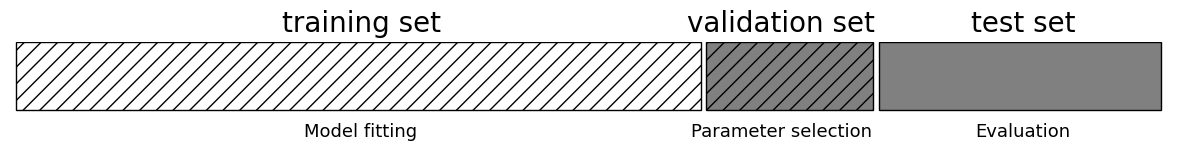

In [32]:
mglearn.plots.plot_threefold_split()

- Después de seleccionar los mejores parámetros utilizando el `conjunto de validación`, podemos `reconstruir un modelo utilizando los parámetros ajustados` que encontramos, pero ahora `entrenado tanto en los datos de entrenamiento y los datos de validación`. De esta forma, podemos utilizar tantos datos como sea posible para construir nuestro modelo. Esto nos lleva a la siguiente implementación

In [33]:
from sklearn.svm import SVC

- Dividimos los datos en conjunto de `entrenamiento+validación` y conjunto de `prueba`

In [34]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

- Dividimos el conjunto de `entrenamiento+validación` en conjuntos de `entrenamiento` y `validación`

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

In [36]:
print("Size of training set: {} size of validation set: {} size of test set: {}\n".
      format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 84 size of validation set: 28 size of test set: 38



In [37]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train) # Ajuste del modelo SVC
        score = svm.score(X_valid, y_valid) # Score para selección de parámetros
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma} # Almacenamos el mejor score y sus parámetros

- `Reconstruimos el modelo en el conjunto combinado de entrenamiento y validación`, y lo `evaluamos en el conjunto de prueba`

In [38]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


- `El mejor score en el conjunto de validación es del 96%`: ligeramente inferior a la anterior, probablemente porque utilizamos menos datos para entrenar el modelo (`X_train es menor ahora porque dividimos nuestro conjunto de datos dos veces`). Sin embargo, el score en el conjunto de prueba, el que realmente nos dice que tan buena es la generalización, es aún más baja, un 92%. Así que `sólo podemos afirmar que clasificamos los nuevos datos con un 92% de acierto, y no con un 97% como pensábamos antes`.

- `La distinción entre el conjunto de entrenamiento, el conjunto de validación y el conjunto de prueba es fundamentalmente importante` para aplicar los métodos de aprendizaje automático en la práctica. `Cualquier decisión tomada basada en la precisión del conjunto de prueba "filtra" información del conjunto de prueba al modelo`. Por lo tanto, es importante mantener un conjunto de prueba separado, que sólo se utiliza para la evaluación final. 

- Es una buena práctica `realizar todo el análisis exploratorio y la selección del modelo utilizando la combinación de entrenamiento y validación, y reservar el conjunto de prueba para la evaluación final`, incluso en el caso de la visualización exploratoria. En sentido estricto, `evaluar más de un modelo en el conjunto de prueba y elegir el mejor de los dos resultará en una estimación demasiado optimista` de la precisión del modelo.

### Grid Search con validación cruzada

- `Aunque el método de dividir los datos en un conjunto de entrenamiento, uno de validación y otro de prueba que acabamos de ver es factible y se utiliza con relativa frecuencia, es bastante sensible a la forma en que se dividen los datos`. De la salida del fragmento de código anterior podemos ver que el `grid-search` selecciona `'C': 10, 'gamma': 0.001`, como los mejores parámetros, mientras que la salida del código de la sección anterior selecciona `'C': 100, 'gamma': 0.001` como los mejores parámetros. Para una mejor estimación del rendimiento de la generalización, `en lugar de usar una única división en un conjunto de entrenamiento y otro de validación, podemos usar la validación cruzada para evaluar el rendimiento de cada combinación de parámetros`. Este método puede codificarse como sigue:

In [39]:
import numpy as np

In [40]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C) # Entrena SVC para cada parámetro
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5) # Calcula validación cruzada
        score = np.mean(scores) # Calcula media de la validación cruzada para precisión
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

- `Reconstruimos el modelo en el conjunto combinado de entrenamiento y validación`

In [41]:

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

- Para evaluar la precisión de `SVM` utilizando un ajuste particular de `C` y `gamma` con `5-fold` validación cruzada, necesitamos entrenar `36 * 5 = 180 modelos`. Como puede imaginarse el `principal inconveniente del uso de la validación cruzada es el tiempo que lleva entrenar todos estos modelos`. La siguiente visualización ilustra cómo se selecciona la mejor configuración de parámetros en el código anterior

```{figure} ./imgs/best_params_cv.png
:name: best_params_cv
:align: center
```

- Para cada ajuste de parámetros (sólo se muestra un subconjunto), `se calculan cinco valores de precisión`, uno para cada división en la validación cruzada. A continuación, `se calcula la precisión media` de la validación para cada parámetro. `Se eligen los parámetros con la mayor precisión media de validación, marcados con un círculo`.

```{admonition} Observación
:class: tip

Como hemos dicho antes, `la validación cruzada es una forma de evaluar un determinado algoritmo en un conjunto de datos específico`. Sin embargo, a menudo se utiliza junto con métodos de búsqueda de parámetros como `Grid Search`. Por esta razón, normalmente se utiliza el término `validación cruzada` coloquialmente para referirse a un `Grid Search` con `validación cruzada`.
```

- El proceso general de división de los datos, la ejecución de `grid search` y la evaluación de los parámetros finales se ilustra en la siguiente figura

```{figure} ./imgs/kfold_validation.png
:name: kfold_validation
:align: center

Resumen del proceso de selección de parámetros y evaluación de modelos con `GridSearchCV`.
```

- Debido a que `grid search` con `validación cruzada` es un método tan comúnmente utilizado para ajustar parámetros, `scikit-learn` proporciona la clase `GridSearchCV`, que lo implementa en la forma de un estimador. Para utilizar la clase `GridSearchCV`, primero hay que especificar los parámetros sobre los que se quiere buscar utilizando un `diccionario`. A continuación, `GridSearchCV` realizará todos los ajustes necesarios del modelo. Las `claves` (keys) del diccionario son los `nombres de los parámetros que queremos ajustar` (tal y como se indican cuando se construye el modelo, en este caso, `C` y `gamma`), y los `valores` (values) son los ajustes de los parámetros que queremos probar. Probar los valores `0,001, 0,01, 0,1, 1, 10 y 100 para C y gamma` se traduce en lo siguiente diccionario

In [42]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


- Ahora podemos instanciar la clase `GridSearchCV` con el modelo `(SVC)`, el parámetro a buscar (`param_grid`), y la estrategia de validación cruzada que queremos utilizar (digamos `validación cruzada estratificada 5-fold`):

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [44]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

- `GridSearchCV` utilizará la validación cruzada en lugar de la división en un conjunto de entrenamiento y de prueba que utilizábamos antes. `Sin embargo, todavía tenemos que dividir los datos en un conjunto de entrenamiento y otro de prueba, para evitar el sobreajuste de los parámetros`

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

- El objeto `grid_search` que hemos creado `se comporta como un clasificador`; podemos llamar a los métodos estándar `fit, predict` y `score`. Sin embargo, `cuando llamamos a fit, se ejecutará una validación cruzada para cada combinación de parámetros que hayamos especificado` en `param_grid`

In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

- El objeto `GridSearchCV` no sólo busca los mejores parámetros, sino que también automáticamente un `nuevo modelo en todo el conjunto de datos de entrenamiento con los parámetros que han dado el mejor rendimiento en la validación cruzada`. La clase `GridSearchCV` proporciona una interfaz muy conveniente para acceder al modelo reentrenado utilizando los métodos `predict` y `score`. Para `evaluar lo bien que generalizan los mejores parámetros encontrados`, podemos llamar a `score` en el conjunto de pruebas

In [47]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


- Al elegir los parámetros mediante la validación cruzada, `encontramos un modelo que alcanza el 97% de precisión en el conjunto de prueba`. `Lo importante aquí es que no utilizamos el conjunto de prueba para elegir los parámetros`. Los parámetros encontrados se anotan en el atributo `best_params_` y la mejor precisión de la validación cruzada (la precisión media sobre las diferentes divisiones para esta configuración de parámetros) se almacena en `best_score_`

In [48]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


```{admonition} Observación
:class: tip

De nuevo, tenga cuidado de no confundir `best_score_` con el rendimiento de generalización del modelo calculado por el método score en el conjunto de prueba. El uso del método score (o la evaluación de la salida del método de predicción) emplea un modelo entrenado en todo el conjunto de entrenamiento. `El atributo best_score_ almacena la precisión media de la validación cruzada, con la validación cruzada realizada en el conjunto de entrenamiento`.
```

- A veces es útil tener `acceso al modelo real que se encontró`, por ejemplo, para ver los `coeficientes o la importancia de las características`. Puede acceder al modelo con los mejores parámetros entrenados en todo el conjunto de entrenamiento utilizando el atributo `best_estimator_`

In [49]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


- Como el propio `grid_search` tiene métodos de predicción y score, no es necesario utilizar `best_estimator_` para hacer predicciones o evaluar el modelo.

### Análisis del resultado de la validación cruzada

- A menudo es útil visualizar los resultados de la validación cruzada, para entender cómo la generalización del modelo depende de los parámetros que estamos buscando. Como los `grid search` son bastante costosos desde el punto de vista computacional, `a menudo es una buena idea empezar con grids de múltiples medidas, ya sean grandes o pequeños`. A continuación, podemos inspeccionar los resultados del `grid search` validado, y posiblemente ampliar nuestra búsqueda. Los resultados de un `grid search` se pueden encontrar en el atributo `cv_results_`, que es un diccionario que almacena todos los aspectos de la búsqueda. Este contiene muchos detalles, como se puede ver en la siguiente salida, y es mejor verlo después de convertirlo en un `DataFrame` de `pandas`. Mostramos solo algunas columnas, para que se puedan diferenciar en el book, pero en su máquina puede visualizarla todas usando la orden `results.head()`. `GridSearchCV.cv_results_` incluye los `resultados de tiempo para scoring y ajuste de parámetros en cada pliegue`. Por ejemplo `mean_score_time` es la cantidad media de tiempo que se necesita para scoring en los datos de cada pliegue `cv`, para cada conjunto de parámetros que definió en el `grid-search`. 

In [50]:
import pandas as pd

In [51]:
results = pd.DataFrame(grid_search.cv_results_)
results[['mean_fit_time', 'std_fit_time', 'mean_score_time',
         'std_score_time', 'param_C', 'param_gamma']].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma
0,0.000801,0.000400,0.000200,0.000400,0.001,0.001
1,0.000401,0.000491,0.000200,0.000400,0.001,0.01
2,0.000413,0.000506,0.000401,0.000491,0.001,0.1
3,0.000600,0.000490,0.000000,0.000000,0.001,1
4,0.000585,0.000557,0.000000,0.000000,0.001,10


- Cada fila de resultados corresponde a un ajuste de parámetros concreto. `Para cada ajuste, se registran los resultados de todas las divisiones de validación cruzada, así como la media y la desviación estándar de todas las divisiones`. Como buscamos una red bidimensional de parámetros (`C y gamma`), esto se visualiza mejor como un `mapa de calor`. Primero `extraemos las puntuaciones medias de la validación` y luego las reformamos para que los ejes correspondan a `C y gamma`.

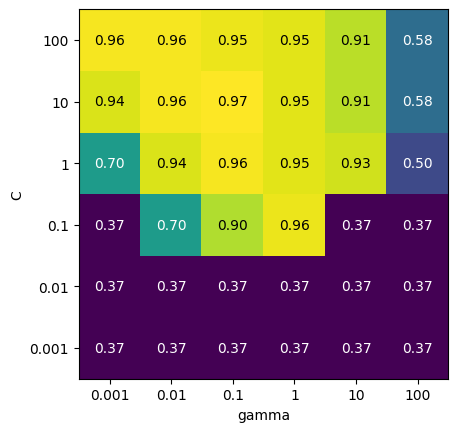

In [52]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', 
                      xticklabels=param_grid['gamma'], 
                      ylabel='C', 
                      yticklabels=param_grid['C'], 
                      cmap="viridis");

- Cada punto del mapa de calor corresponde a una ejecución de validación cruzada, con un parámetro en particular. `El color codifica la precisión de la validación cruzada`, siendo los colores claros los relacionados con alta precisión y los colores oscuros con baja precisión. Se puede ver que `SVC es muy sensible a la configuración de los parámetros`. Para muchos de los ajustes de los parámetros, la precisión está en torno al 37%, lo que es bastante malo; para otros ajustes, la precisión está en torno al 96%. 

- De este gráfico se desprenden varias cosas. En primer lugar, `los parámetros que ajustamos son muy importantes para obtener un buen rendimiento`. Ambos parámetros `(C y gamma)` son muy importantes, ya que su ajuste puede cambiar la precisión del 37% al 96%. Además, `los rangos que elegimos para los parámetros son rangos en los que vemos cambios significativos en el resultado`. También es importante tener en cuenta que `los rangos de los parámetros son lo suficientemente amplios: los valores óptimos de cada parámetro no están en los bordes del gráfico`. 

- Veamos algunos gráficos en los que `el resultado es menos ideal`, porque los rangos de búsqueda no fueron elegidos correctamente

In [53]:
import matplotlib.pyplot as plt

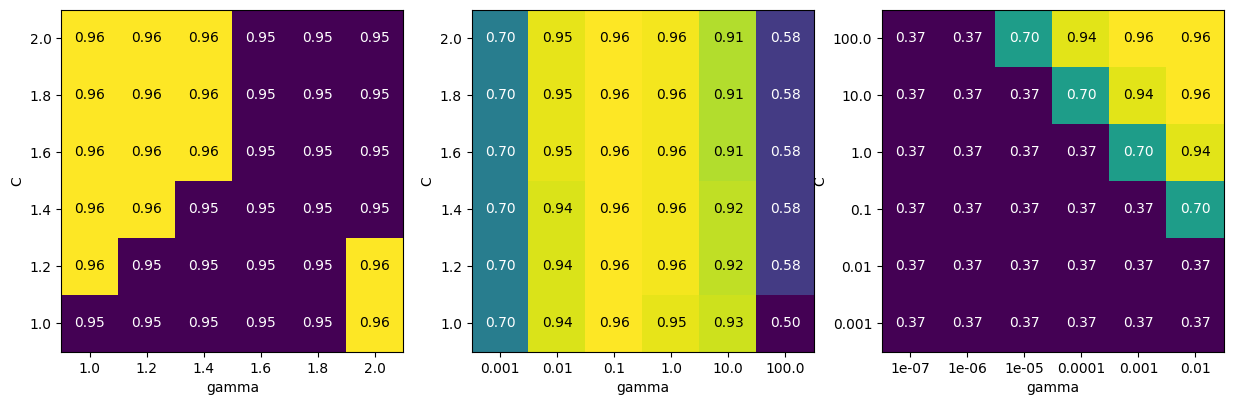

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(scores, 
                                         xlabel='gamma', 
                                         ylabel='C', 
                                         xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], 
                                         cmap="viridis", 
                                         ax=ax)

- El primer panel no muestra ningún cambio, con scores aproximadamente constantes en toda la red de parámetros. En este caso, esto se debe a una escala y un `rango inadecuado para los parámetros C y gamma`. Sin embargo, `si no se aprecia ningún cambio en la precisión a lo largo de los diferentes ajustes de los parámetros, también puede ser que un parámetro no sea importante en absoluto`. Suele ser bueno probar primero valores muy extremos, para ver si hay algún cambio en la precisión como resultado de cambiar un parámetro. El segundo panel muestra un patrón de rayas verticales. Esto indica que sólo el ajuste del parámetro `gamma` hace alguna diferencia. Esto podría significar que el parámetro `gamma busca valores interesantes, pero el parámetro C no lo hace, o podría significar que el parámetro C no es importante`.

- El tercer panel muestra `cambios tanto en C como en gamma`. Sin embargo, podemos ver que en toda la toda la parte inferior izquierda del gráfico, no ocurre nada interesante. Probablemente podemos excluir los valores muy pequeños de las futuras búsquedas en la red. `La configuración óptima de los parámetros está en la parte superior derecha`. `Como el óptimo está en el borde del gráfico, podemos esperar que puede haber valores aún mejores más allá de este límite, y podríamos cambiar nuestro rango de búsqueda para incluir más parámetros en esta región`. Ajustar la red de parámetros basándose en las puntuaciones de validación cruzada es perfectamente correcto, y una buena manera de explorar la importancia de los diferentes parámetros. Sin embargo, `no debería probar diferentes rangos de parámetros en el conjunto de pruebas final`, ya que, como hemos dicho antes, `la evaluación del conjunto de pruebas sólo debería realizarse una vez que sepamos exactamente qué modelo queremos utilizar`.

### Búsqueda sobre espacios que no son una red

- En algunos casos, probar todas las combinaciones posibles de todos los parámetros, como suele hacer `GridSearchCV`, no es una buena idea. Por ejemplo, `SVC` tiene un parámetro de `kernel`, y dependiendo del `kernel` que se elija, otros parámetros serán relevantes. Si `kernel='linear'`, el modelo es lineal, y sólo se utiliza el parámetro `C`. Si `kernel='rbf'`, se utilizan los parámetros `C y gamma` (pero no otros parámetros como el grado). En este caso, la búsqueda de todas las combinaciones posibles de `C, gamma y kernel` no tendría sentido: si `kernel='linear', gamma` no se utiliza, y probar diferentes valores de `gamma` sería una pérdida de tiempo. Recuerde que `kernel='rbf'` es el `kernel de función de base radial (RBF)` con mapeo de características $\phi(\boldsymbol{x})=\exp(\|\boldsymbol{x}-x_{i}\|/2\sigma^2),~\gamma=1/\sigma^2$. Para ver todas las opciones de kernel gaussianos (ver [Kernels for Gaussian Processes](https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels)).

- Para tratar este tipo de parámetros "condicionales", `GridSearchCV` permite que param_grid sea una lista de diccionarios. Cada diccionario de la lista se expande en una red `(grid)` independiente. Una posible búsqueda en red que incluya el núcleo (`kernel`) y los parámetros podría ser así:

In [55]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


- En la primera red, el parámetro del `kernel` se establece siempre en `'rbf'` (no que la entrada de `kernel` es una lista de longitud uno), y se varían los parámetros `C` y `gamma`. `En la segunda red, el parámetro kernel siempre se establece como lineal, y sólo se varía C`. Ahora apliquemos esta búsqueda de parámetros más compleja

In [56]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


- Observemos de nuevo el `cv_results_`. Como era de esperar, si el núcleo es `"lineal"`, sólo varía `C`. Nótese que el `pandas tiene un total de 16 columnas`.

In [57]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T.iloc[: , :6])
results.T.shape

,0,1,2,3,4,5
mean_fit_time,0.000623,0.000612,0.0002,0.000311,0.000616,0.0
std_fit_time,0.00051,0.0005,0.0004,0.000406,0.000504,0.0
mean_score_time,0.0004,0.0,0.0002,0.000402,0.000201,0.000411
std_score_time,0.00049,0.0,0.0004,0.000492,0.000402,0.000504
param_C,0.001,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10,100
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826


(16, 42)

```{admonition} Uso de diferentes estrategias de validación cruzada con la búsqueda en red
:class: tip

Al igual que `cross_val_score, GridSearchCV` utiliza por defecto la validación cruzada estratificada `k-fold` para la clasificación, y la `validación cruzada k-fold` para la regresión. Sin embargo, también puede pasar cualquier divisor de validación cruzada, como se describe en `"Más control sobre la validación cruzada"`, como parámetro `cv` en `GridSearchCV`. En particular, para obtener una única división en un conjunto de entrenamiento y otro de validación, puede utilizar `ShuffleSplit` o `StratifiedShuffleSplit` con `n_iter=1` (número de iteraciones de reordenamiento y división). Esto puede ser útil para conjuntos de datos muy grandes o para modelos muy lentos.
```

### Validación cruzada anidada

- En los ejemplos anteriores, pasamos de utilizar una única división de los datos en conjuntos de entrenamiento validación y prueba, a `dividir los datos en conjuntos de entrenamiento y prueba, y luego de validación cruzada en el conjunto de entrenamiento`. Pero al utilizar `GridSearchCV` como se ha descrito anteriormente, `seguimos teniendo una única división de los datos en conjuntos de entrenamiento y de prueba`, lo que puede hacer que nuestros resultados sean inestables y nos haga depender demasiado de esta única división de los datos. Podemos ir un paso más allá, y `en lugar de dividir los datos originales en conjuntos de entrenamiento y prueba una vez, utilizar múltiples divisiones de validación cruzada`. Esto dará lugar a lo que se denomina `validación cruzada anidada`. 

- `En la validación cruzada anidada, hay un bucle externo sobre las divisiones de los datos en conjuntos de entrenamiento y de prueba. Para cada uno de ellos, se ejecuta una búsqueda en red` (que puede dar lugar a diferentes parámetros óptimos para cada división en el bucle externo). A continuación, para cada división exterior, se informa del scoring del conjunto de prueba utilizando los mejores parámetros. `El resultado de este procedimiento es una lista de puntuaciones, no un modelo ni un conjunto de parámetros`. 

- `Las puntuaciones nos dicen lo bien que generaliza un modelo`, dados los mejores parámetros encontrados por la red. Como no proporciona un modelo que pueda utilizarse con nuevos datos, la `validación cruzada anidada no suele utilizarse cuando se busca un modelo predictivo para aplicarlo a datos futuros`. Sin embargo, puede ser útil para evaluar lo bien que funciona un modelo determinado en un conjunto de datos concreto. La implementación de la `validación cruzada anidada` en `scikit-learn` es sencilla. Llamamos a `cross_val_score` con una instancia de `GridSearchCV` como modelo

In [58]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


- El resultado de nuestra `validación cruzada anidada` puede resumirse en que `"SVC puede alcanzar un 96.67% de precisión media de validación cruzada en el conjunto de datos del iris"`, nada más y nada menos. Aquí, utilizamos la validación cruzada estratificada de cinco pliegues (`5-fold`) tanto en el bucle interno como en el externo. Como nuestra red de parámetros contiene 36 combinaciones de parámetros, `el resultado es la cantidad de 36 * 5 * 5 = 900 modelos construidos, lo que hace que la validación cruzada anidada sea un procedimiento muy costoso`.

- Aquí, `utilizamos el mismo divisor de validación cruzada en el bucle interno y en el externo`; sin embargo, esto no es necesario y se puede utilizar cualquier combinación de estrategias de validación cruzada en el bucle interno y en el externo. Puede ser un poco complicado entender lo que está sucediendo en la línea simple dada anteriormente, y puede ser útil `visualizarlo como bucles for, como se hace en la siguiente implementación simplificada`

In [59]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [60]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

In [61]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


### Paralelización de la validación cruzada y la búsqueda en red

- Si bien la ejecución de una `búsqueda en red` sobre muchos parámetros y en grandes conjuntos de datos puede ser `computacionalmente un reto`, también es un paralelismo tedioso. Esto significa que la construcción de un modelo utilizando un ajuste de parámetros particular en una división de validación cruzada particular `puede hacerse con total independencia de los demás ajustes de parámetros y modelos`. `Esto hace que la búsqueda en red y la validación cruzada sean candidatas ideales para la paralelización en múltiples núcleos de CPU o en un clúster`. Se puede hacer uso de múltiples núcleos en `GridSearchCV` y `cross_validation` estableciendo el parámetro `n_jobs` con el número de núcleos de CPU que desee utilizar. `Puede establecer n_jobs=-1 para utilizar todos los núcleos disponibles`.

- Debe tener en cuenta que `scikit-learn` no permite el anidamiento de operaciones paralelas. Por lo tanto, si está utilizando la opción `n_jobs` en su modelo (por ejemplo, `random forest`), no puede utilizarla en `GridSearchCV` para buscar sobre este modelo. Si su `conjunto de datos y su modelo son muy grandes, puede ser que el uso de muchos núcleos consuma demasiada memoria`, y deberías controlar el uso de la memoria cuando construyas modelos grandes en paralelo. `También es posible paralelizar la búsqueda en red y la validación cruzada en varias máquinas en un clúster`. Sin embargo, es posible utilizar el marco paralelo de `IPython` para las búsquedas paralelas de la red, también puede `escribir el bucle for sobre los parámetros como lo hicimos en "Búsqueda simple en la red"`. **`Para los usuarios de Spark, también existe el paquete spark-sklearn, recientemente desarrollado, que permite ejecutar una búsqueda grid sobre un cluster Spark ya establecido`**.

## Métricas de evaluación y scoring

- Hasta ahora, hemos evaluado el `rendimiento de la clasificación utilizando la precisión (accuracy)` (la fracción de muestras correctamente clasificadas) y el `rendimiento de la regresión` mediante el $R^2$. Sin embargo, éstas son sólo dos de las muchas formas posibles de resumir la eficacia de un modelo supervisado en un conjunto de datos determinado. `En la práctica, estas métricas de evaluación pueden no ser apropiadas para su aplicación, y es importante elegir la métrica correcta cuando se selecciona entre modelos y se ajustan los parámetros`.

### Tenga en cuenta el objetivo final

- Al seleccionar una métrica, siempre hay que tener en cuenta el objetivo final de la aplicación de aprendizaje automático. En la práctica, normalmente nos interesa no sólo hacer predicciones precisas, sino que utilizar estas predicciones como parte de un proceso de decisiones. `Antes de elegir una métrica de aprendizaje automático, debería pensar en el objetivo de alto nivel de la aplicación, a menudo llamado métrica de negocio`. `Las consecuencias de la elección de un algoritmo concreto para una aplicación de aprendizaje automático se denominan impacto empresarial`. 

- Puede que el objetivo de alto nivel sea evitar accidentes de tráfico, o reducir el número de ingresos hospitalarios. También podría ser conseguir más usuarios para su sitio web, o que los usuarios gasten más dinero en su tienda. Al elegir un modelo o ajustar los parámetros, `debe elegir el modelo o los valores de los parámetros que influyan más positivamente en la métrica del negocio`. A menudo, esto es difícil, ya que `la evaluación del impacto comercial de un modelo particular puede requerir ponerlo en producción en un sistema de la vida real`.

- En las primeras fases de desarrollo, y para ajustar los parámetros, `a menudo es inviable poner los modelos en producción sólo para probarlos, debido a los elevados riesgos empresariales o personales que puede conllevar`. Imagínese que se evalúa la `capacidad que tiene un coche autodirigido de evitar a los peatones de un coche, dejándolo circular sin verificarlo primero`. Si el modelo es malo, los peatones tendrán problemas. Por lo tanto, a menudo tenemos que encontrar un procedimiento de evaluación alternativo, utilizando una métrica de evaluación que sea más fácil de calcular. Por ejemplo, podríamos probar la `clasificación de imágenes de peatones frente a las de no peatones y medir la precisión`.

- Hay que tener en cuenta que esto es sólo un sustituto, y que vale la pena encontrar la métrica más cercana al objetivo original de la empresa, que sea factible de evaluar. Esta métrica más cercana debe utilizarse siempre que sea posible para la evaluación y selección de modelos. `El resultado de esta evaluación puede no ser un solo número - consecuencia de su algoritmo puede ser que tenga un 10% más de clientes, pero que cada cliente gaste un 15% menos - pero debería capturar el impacto empresarial esperado de la elección de un modelo en lugar de otro.` En esta sección, primero discutiremos las métricas para el importante caso especial de la clasificación binaria, y luego pasaremos a la clasificación multiclase, y por último, a la regresión.

### Métricas para la clasificación binaria

- La clasificación binaria es probablemente la aplicación más común y conceptualmente simple de aprendizaje automático en la práctica. `Sin embargo, todavía hay una serie de advertencias en evaluar incluso esta sencilla tarea`. Antes de entrar en las métricas alternativas, echemos un vistazo a la forma en que se mide la precisión, la cual puede ser engañosa. Recordemos que para la clasificación binaria, a menudo hablamos de una `clase positiva` y una `clase negativa`, entendiendo que la clase positiva es la que estamos buscando. 

### Tipos de errores

- A menudo, la precisión (`accuracy`), la cual divide el número de predicciones correctas por el número total de predicciones, no es una buena medida del rendimiento predictivo, ya que el número de errores que cometemos no contiene toda la información que nos interesa. `Imagine una aplicación para la detección temprana del cáncer mediante una prueba automatizada. Si la prueba es negativa, el paciente se considerará sano, mientras que si la prueba es positiva, el paciente se someterá a un examen adicional`. En este caso, llamaríamos `clase positiva` a una prueba positiva (un indicio de cáncer), y `clase negativa` a una prueba negativa. `No podemos suponer que nuestro modelo funcione siempre a la perfección, este cometerá errores`. Para cualquier aplicación, tenemos que preguntarnos cuáles son las consecuencias de estos errores en el mundo real.

- Un posible error es que un `paciente sano sea clasificado como positivo`, lo que lleva a pruebas adicionales. Esto conlleva algunos costes y una molestia para el paciente (y posiblemente angustia mental). Una `predicción positiva incorrecta se denomina` **`falso positivo`**.  Otro error posible es que un `paciente enfermo sea clasificado como negativo`, y no reciba más pruebas ni tratamiento. **`El cáncer no diagnosticado podría dar lugar a graves problemas de salud, e incluso podría ser mortal`**. Un error de este tipo - una `predicción negativa incorrecta se denomina` **`falso negativo`**. En estadística, un `falso positivo también se conoce como error de tipo I`, y un `falso negativo como error de tipo II`. Nos ceñiremos a los términos `"falso negativo" y "falso positivo"`, ya que son más explícitos y fáciles de recordar. En el ejemplo del diagnóstico de cáncer, está claro que `queremos evitar los falsos negativos` en la medida de lo posible, `mientras que los falsos positivos pueden ser un problema, pueden considerarse más bien una molestia menor`.

- Aunque este es un ejemplo especialmente drástico, `las consecuencias de los falsos positivos y los falsos negativos no suelen ser las mismas`. En las `aplicaciones comerciales, podría ser posible asignar valores en dólares a ambos tipos de errores, lo que permitiría medir el error de una predicción concreta en dólares, en lugar de en precisión`. Esto podría ser mucho más significativo para tomar decisiones comerciales sobre qué modelo utilizar.

### Conjuntos de datos desequilibrados

- Los tipos de errores desempeñan un papel importante cuando una de las dos clases es mucho más frecuente que la otra. Esto es muy común en la práctica; un buen ejemplo es la predicción de `clicks`, en la que cada punto de datos representa una "impresión", es decir, un elemento que se ha mostrado a un usuario. Este elemento puede ser un anuncio, una historia relacionada o una persona relacionada a la que seguir en las redes sociales. El objetivo es, si se muestra un elemento concreto, predecir si un usuario hará click en él (indicando que está interesado). La mayoría de las cosas que se muestran a los usuarios en Internet (en particular, los anuncios) no darán lugar a un click. Es posible que tenga que mostrar a un usuario 100 anuncios o artículos antes de que encuentre algo lo suficientemente interesante como para hacer click. 

- Esto da lugar a un conjunto de datos en el que, por cada 99 puntos de datos "no click", hay 1 punto de datos "con click". `En otras palabras, el 99% de las muestras pertenecen a la clase "no click"`. **`Conjuntos de datos en los que una clase es mucho más frecuente que la otra se denominan conjuntos de datos con clases desequilibradas`**. En realidad, los datos desequilibrados son la norma, y `es raro que los eventos de interés tengan una frecuencia igual o incluso similar en los datos`. Supongamos que construimos un clasificador que tiene una precisión del 99% en la tarea de predicción de clicks. ¿Qué nos dice esto? `Un 99% de precisión suena impresionante, pero este no toma en cuenta el desequilibrio de clases`.

- Se puede conseguir un 99% de precisión sin construir un modelo de aprendizaje automático, prediciendo siempre "no click". Por otro lado, incluso con datos desequilibrados, un modelo con un 99% de precisión podría ser bastante bueno. Sin embargo, `la precisión no nos permite distinguir el modelo constante "no click" de un modelo potencialmente bueno`. Para ilustrarlo, crearemos un conjunto de datos desequilibrados 9:1 a partir del conjunto de datos `digits`, clasificando el dígito 9 contra las otras nueve clases.

In [62]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [63]:
digits = load_digits()

In [64]:
print("Data shape: ", digits.data.shape, "; Target shape", digits.target.shape)

Data shape:  (1797, 64) ; Target shape (1797,)


In [65]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
np.unique(digits.data)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

In [67]:
y = digits.target == 9 # Boolean
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

- Podemos utilizar `DummyClassifier` para predecir siempre la clase mayoritaria (aquí "not nine") `para ver lo poco informativa que puede ser el (accuracy)`

In [68]:
from sklearn.dummy import DummyClassifier
import numpy as np

In [69]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


- Obtuvimos una precisión cercana al 90% sin aprender nada. Esto puede parecer sorprendente, pero pero piénselo un momento. `Imagine que alguien le dice que su modelo tiene un 90% de precisión. Podrías pensar que han hecho un buen trabajo. Pero dependiendo del problema, ¡eso podría ser posible con sólo predecir una clase! Comparemos esto con el uso de un clasificador real`.

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


- Según la precisión, el `DecisionTreeClassifier es sólo ligeramente mejor que el predictor constante. Esto podría indicar que algo está mal en la forma en que utilizamos DecisionTreeClassifier, o bien que accuracy no es una buena medida en este caso`. Para comparar, evaluemos otro clasificador, `LogisticRegression`

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.98


- El clasificador `dummy` que produce resultados aleatorios es claramente el peor de todos (según su `accuracy`), mientras que `LogisticRegression` produce muy buenos resultados. Esto hace que sea muy difícil juzgar cuál de estos resultados es realmente útil. El problema es que accuracy es una medida inadecuada para cuantificar el rendimiento predictivo en este entorno desequilibrado. `En el resto de este capítulo, exploraremos métricas alternativas que proporcionen una mejor orientación en la selección de modelos`. En particular, nos gustaría disponer de métricas que nos digan cuán mejor es un modelo, en vez de hacer predicciones "más frecuentes" o predicciones aleatorias, como se calculan en `pred_most_frequent`. `Si utilizamos una métrica adecuada para evaluar nuestros modelos, debería ser capaz de eliminar estas predicciones sin sentido`.

### Matrices de confusión

- Una de las formas más completas de representar el resultado de la evaluación de la clasificación binaria es el uso de `matrices de confusión`. Inspeccionemos las predicciones de `LogisticRegres` de la sección anterior utilizando la función `confusion_matrix`. Ya hemos almacenado las predicciones del conjunto de prueba en `pred_logreg`

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


- La salida de `confusion_matrix` es una `matriz de dos por dos, donde las filas corresponden a las clases verdaderas y las columnas corresponden a las clases predichas`. Cada entrada cuenta la frecuencia con la que una muestra que pertenece a la clase correspondiente a la fila (aquí "not nine" y "nine") fue clasificada como la clase correspondiente a la columna.

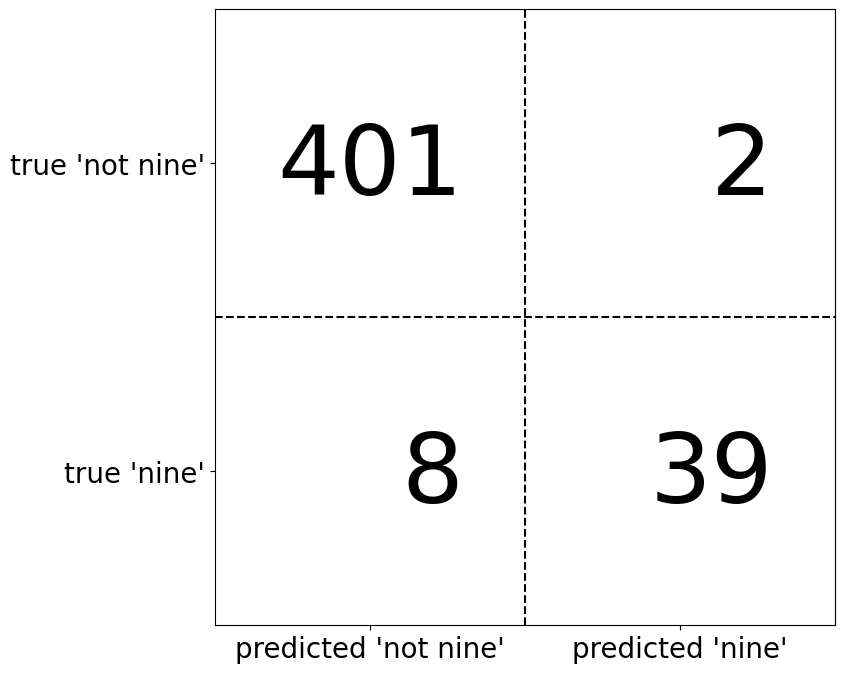

In [76]:
mglearn.plots.plot_confusion_matrix_illustration()

- Las entradas de la `diagonal principal de la matriz de confusión corresponden a las clasificaciones correctas, mientras que las demás entradas nos indican cuántas muestras se han clasificado erróneamente en una clase`. Si declaramos que "nine" es la clase positiva, podemos relacionar las entradas de la matriz de confusión con los términos `falso positivo y falso negativo` que hemos introducido anteriormente. Para completar el cuadro, llamamos `verdaderos positivos a las muestras correctamente clasificadas que pertenecen a la clase positiva y verdaderos negativos a las muestras correctamente clasificadas que pertenecen a la clase negativa. Estos términos suelen abreviarse como` **FP, FN, TP y TN**, y conducen a la siguiente interpretación de la matriz de confusión

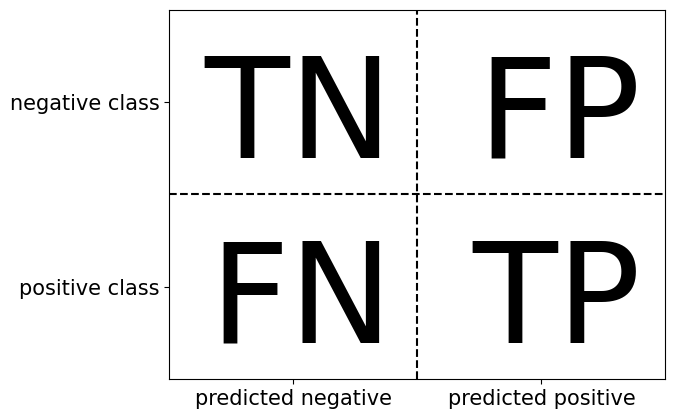

In [77]:
mglearn.plots.plot_binary_confusion_matrix()

- Ahora utilicemos la `matriz de confusión` para comparar los modelos que hemos ajustado antes (los dos modelos `dummy, árbol de decisión y regresión logística`)

In [78]:
print("\nDummy model:")
print(confusion_matrix(y_test, pred_most_frequent))


Dummy model:
[[403   0]
 [ 47   0]]


In [79]:
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))


Decision tree:
[[390  13]
 [ 24  23]]


In [80]:
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))


Logistic Regression
[[402   1]
 [  6  41]]


- Si se observa la matriz de confusión, está claro que algo va mal con `pred_most_frequent` porque siempre predice la misma clase, tiene cero verdaderos y falsos positivos (0). `Las predicciones realizadas por el árbol de decisión tienen mucho más sentido que las predicciones dummy, aunque el accuracy era casi el misma`. Por último, podemos ver que la regresión logística es mejor que `pred_tree` en todos los aspectos: tiene más verdaderos positivos y verdaderos negativos, mientras que tiene menos falsos positivos y falsos negativos. `De esta comparación se desprende que, sólo el árbol de decisión y la regresión logística dan resultados razonables, y que la regresión logística funciona mejor que el árbol en todos los aspectos`. Sin embargo, la inspección de la matriz de confusión completa es un poco acumulativa, y aunque obtuvimos mucha información al observar todos los aspectos de la matriz, `el proceso fue muy manual y cualitativo`. Hay varias formas de resumir la información de la matriz de confusión, las cuales discutiremos a continuación.

```{admonition} Accuracy
:class: tip

Ya vimos una forma de resumir el resultado en la `matriz de confusión`, calculando su `accuracy`, que puede expresarse como

$$
\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}.
$$

En otras palabras, el `accuracy es el número de predicciones correctas (TP y TN) dividido por el número de todas las muestras` (todas las entradas de la matriz de confusión sumadas).
```

- `Precision, recall y f-score`. Hay otras formas de resumir la matriz de confusión, siendo las más comunes: `precision, recall y f-score`.

```{admonition} Precision
:class: tip

`Precision` mide cuántas de las muestras predichas como positivas son realmente positivas, es decir, `precision` intenta responder a la siguiente pregunta: ¿qué proporción de identificaciones positivas fue correcta?

$$
\text{Precision} = \frac{TP}{TP+FP} 
$$

`Precision` se utiliza como métrica de rendimiento cuando `el objetivo es limitar el número de falsos positivos`. 
```

- Como ejemplo, imaginemos un modelo para predecir si un nuevo medicamento será eficaz en el tratamiento de una enfermedad en los ensayos clínicos. `Los ensayos clínicos son notoriamente caros, y una empresa farmacéutica sólo querrá realizar un experimento si está muy seguro de que el fármaco funcionará realmente. Por lo tanto, es importante que el modelo no produzca muchos falsos positivos`, es decir, que tenga `precision` alto. `Precision` `también se conoce como valor predictivo positivo (VPP)`. Nótese que: $FP\rightarrow0$ cuando $\text{Precision}\rightarrow1$ y viceversa; similarmente, $FN\rightarrow0$ cuando $\text{Recall}\rightarrow1$ y viceversa.

```{admonition} Recall
:class: tip

El `recall` mide cuántas de las muestras de la clase positiva son realmente predichas positivas, es decir, `recall` intenta responder a la siguiente pregunta: ¿qué proporción de positivos reales se identificó en forma correcta?

$$
\text{Recall} = \frac{TP}{TP+FN} 
$$

`Recall` se utiliza como métrica de rendimiento cuando `el objetivo es limitar el número de falsos negativos`.
```

- Existe un equilibrio entre la optimización del `recall` y el `precision`. Se puede obtener de forma sencilla, una recuperación perfecta si se predice que todas las muestras pertenecen a la clase positiva. Si se predice que todas las muestras pertenecen a la clase positiva, no habrá falsos negativos ni verdaderos negativos. Sin embargo, predecir todas las muestras como positivas, dará lugar a muchos falsos positivos y, por lo tanto, su `precision` será muy baja. Por otro lado, si se encuentra un modelo que predice sólo el punto de datos del que se está más seguro como positivo y el resto como negativo, entonces `precision` será perfecto (suponiendo que este punto de datos sea de hecho positivo), pero el `recall` será muy malo.

```{admonition} Observación
:class: tip

`Precision` y `recall` son sólo dos de las muchas medidas de clasificación derivadas de `TP, FP, TN y FN`. Puede encontrar un gran resumen de todas las medidas en [Sensitivity_and_specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity). En la comunidad del aprendizaje automático, `precision` y `recall` son las medidas más utilizadas para la clasificación binaria, aunque pueden utilizar otras métricas relacionadas.
```

```{admonition} $f_{1}$-score
:class: tip

Por lo tanto, aunque `precision` y `recall` sean medidas muy importantes, si sólo se tiene en cuenta una de ellas no se obtiene una visión completa. Una forma de resumirlas es usando el `f-score o f-measure`, que es la `media armónica entre precision y recall`:

$$
F=2\cdot\frac{\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}.
$$

Esta variante concreta también se conoce como $f_{1}$-score.
```

- Como tiene en cuenta a `precision` (precisión) y `recall` (recuperación) el $f_{1}$-score puede ser una medida mejor que `accuracy` (exactitud) en conjuntos de datos de clasificación binaria desequilibrados. Vamos a aplicarlo a las predicciones del conjunto de datos "nine vs. rest" que hemos calculado antes. En este caso, supondremos que la clase "nine" es la clase positiva (está etiquetada como `True` mientras que el resto está etiquetado como `False`), por lo que la clase positiva es la clase minoritaria.

In [81]:
from sklearn.metrics import f1_score

In [82]:
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_most_frequent)))

f1 score dummy: 0.00


In [83]:
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))

f1 score tree: 0.55


In [84]:
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score logistic regression: 0.92


- Podemos ver una distinción bastante fuerte entre las predicciones dummy y las predicciones del árbol, lo que no estaba claro cuando se miraba `accuracy` por sí sola. Utilizando $f$-score para la evaluación, resumimos el rendimiento predictivo de nuevo en un número. `Sin embargo,` $f$`-score parece captar nuestra intuición de lo que es un buen modelo mucho mejor que el accuracy`. 

- Sin embargo, una desventaja del $f$-score es que es más difícil de interpretar y explicar que accuracy. Si queremos un resumen más completo de `precision`, `recall` y $f_{1}$-score, podemos utilizar la función de conveniencia `classification_report` para calcular los tres a la vez e imprimirlos en un formato agradable. Las dos últimas filas corresponden a `macro avg` que da a cada predicción un peso similar al calcular la pérdida, pero para datos desequilibrados como lo es este caso, se quiera dar más importancia a alguna predicción en función de su proporción, en ese caso se utiliza la `weighted avg`. Para mas información acerca del uso de `classification_report` (ver [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



- La función `classification_report` produce una línea por clase (aquí, `True` y `False`) e informa `precision, recall` y $f$`-score`. Si consideramos la clase positiva por "not nine", podemos ver en la salida de `classification_report` que obtenemos un $f$-score de 0.94 con el modelo `dummy`. Además, para la clase "not nine" tenemos un `recall` de 1, ya que clasificamos todas las muestras como "not nine".

- La última columna junto al $f$-score proporciona el soporte de cada clase, lo que significa simplemente el número de muestras en esta clase según la verdad básica. La última fila del informe de clasificación muestra una media ponderada (por el número de muestras en la clase) de los números de cada clase. Aquí hay dos informes más, uno para el clasificador `arbol de decisión` y otro para la `regresión logística`

In [87]:
print(classification_report(y_test, pred_tree, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [88]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



- Como puede observar al mirar los informes, las diferencias entre los modelos `dummy` y un modelo muy bueno ya no son tan claras. La elección de la clase que se declarada como clase positiva, tiene un gran impacto en las métricas. Mientras que el $f$-score de la clasificación `dummy` es de 0.13 (frente a 0.89 para la `regresión logística`) en la clase "nine" es de 0.90 frente a 0.99, lo que parece un resultado razonable. Sin embargo, si se observan todas las cifras juntas, se obtiene una imagen bastante precisa, y podemos ver claramente la superioridad de la regresión logística.

### Teniendo en cuenta la incertidumbre

- La matriz de confusión y el informe de clasificación proporcionan un análisis muy detallado de un conjunto concreto de predicciones. Sin embargo, las propias predicciones ya arrojan mucha información que está contenida en el modelo. Como ya comentamos, la mayoría de los clasificadores proporcionan un método `decision_function` o `predict_proba` para `evaluar el grado de certeza de las predicciones`. Hacer predicciones puede verse como un umbral para `decision_function` o `predict_proba` en un punto fijo determinado. En la clasificación binaria utilizamos 0 para `decision_function` y 0.5 para `predict_proba`.

- El siguiente es un ejemplo de una tarea de `clasificación binaria desequilibrada, con 400 puntos en la clase negativa clasificados contra 50 puntos en la clase positiva`. Los datos de entrenamiento se muestran a la izquierda en la siguiente figura. Entrenamos un modelo `kernel SVM` en estos datos, y los gráficos a la derecha de los datos de entrenamiento ilustran los valores de la función de decisión como un mapa de calor. `Puede ver un círculo negro en el gráfico de la parte superior central, que denota que el umbral donde la función de decisión es exactamente cero`. Los puntos dentro de este se clasificarán como la clase positiva, y los puntos fuera de ella como la clase negativa

In [89]:
from mglearn.datasets import make_blobs

In [90]:
X, y = make_blobs(n_samples=400, n_features=50, centers=2, cluster_std=[7.0, 2], random_state=22)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

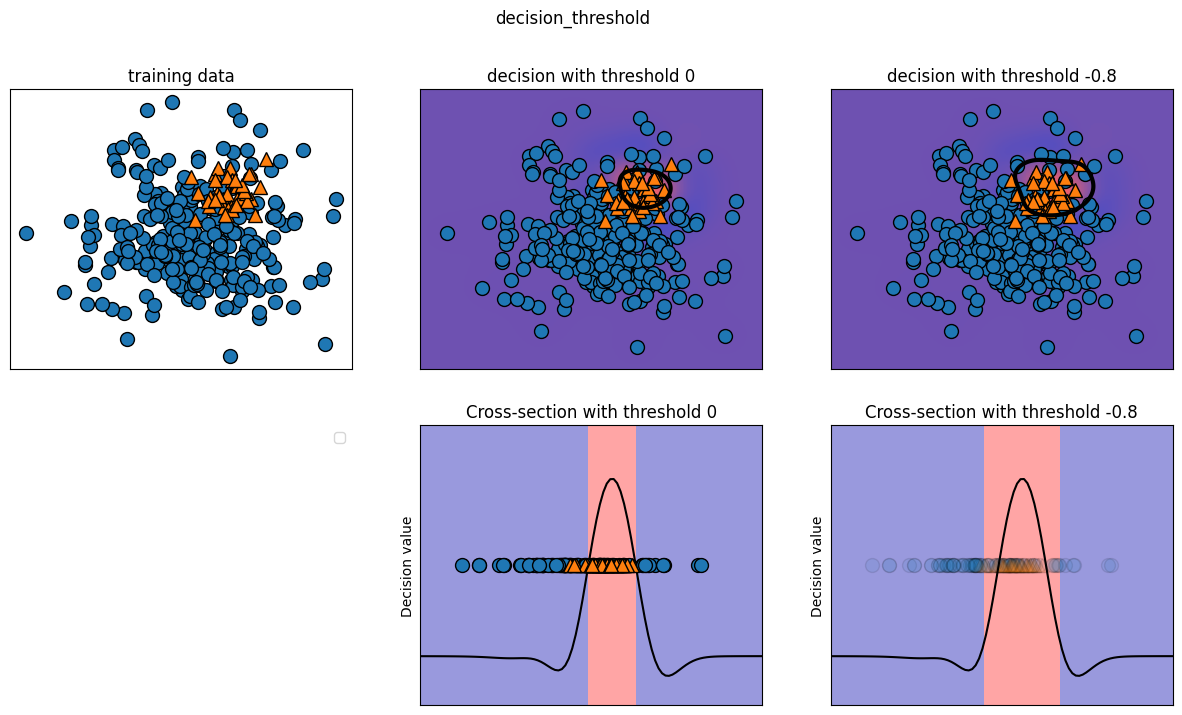

In [92]:
mglearn.plots.plot_decision_threshold()

- Podemos utilizar la función `classification_report` para evaluar `precision` y `recall` de ambas clases

In [93]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        49
           1       0.00      0.00      0.00        51

    accuracy                           0.49       100
   macro avg       0.24      0.50      0.33       100
weighted avg       0.24      0.49      0.32       100



In [94]:
print(confusion_matrix(y_test, svc.predict(X_test)))

[[49  0]
 [51  0]]


- Para la `clase 1`, obtenemos un `recall` bastante pequeño, y un `precision` mixto. Como la clase 0 es mucho más grande, el clasificador se centra en acertar la clase 0 y no la clase 1, más pequeña. Supongamos que, en nuestra aplicación, es más importante tener un alto `recall` para la clase 1, como en el ejemplo del cáncer. `Esto significa que estamos dispuestos a arriesgar más falsos positivos (clase 1 falsa) a cambio de más positivos verdaderos (que aumentarán el recall)`. Las predicciones generadas por `svc.predict` realmente no cumplen con este requisito, pero `podemos ajustar las predicciones para que se centren en un mayor recall para la clase 1, cambiando el umbral de decisión 0`. Por defecto, los puntos con un valor de `decision_function` mayor que 0 se clasificarán como clase 1. `Queremos que más puntos se clasifiquen como de la clase 1, así que tenemos que reducir el umbral (threshold)`.

In [95]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.015

- Veamos el informe de clasificación de esta predicción

In [96]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.51      1.00      0.68        51

    accuracy                           0.51       100
   macro avg       0.26      0.50      0.34       100
weighted avg       0.26      0.51      0.34       100



In [97]:
print(confusion_matrix(y_test, y_pred_lower_threshold))

[[ 0 49]
 [ 0 51]]


- Como se esperaba, `recall y precision` para la clase 1 subió. Ahora estamos clasificando una `región más grande del espacio como clase 1`, como se ilustra en el panel superior derecho de la anterior figura. `Si valora más la precisión que la recuperación, o al revés, o sus datos están muy desequilibrados, cambiar el umbral de decisión es la forma más fácil de obtener mejores resultados`. *Como la función de decisión puede tener rangos arbitrarios, es difícil proporcionar una regla general sobre cómo elegir un umbral*.

```{admonition} Observación
:class: tip

- `Si establece un umbral, debe tener cuidado de no hacerlo utilizando el conjunto de prueba`. Como con cualquier otro parámetro, establecer un umbral de decisión en el conjunto de prueba es probable que produzca resultados demasiado optimistas. `Utilice un conjunto de validación o aplique validación cruzada`. 

- La `media geométrica o G-mean` es una métrica de clasificación desequilibrada que, si se optimiza, `buscará un equilibrio entre la precision y recall`. 

$$
\text{G-mean}=\sqrt{\text{precision}\times\text{recall}}.
$$

- Un enfoque consistiría en `probar el modelo con cada umbral` devuelto por la llamada `precision_recall_curve()` y `seleccionar el umbral con el mayor valor G-mean`. Otras técnicas de oversampling, tales como `SMOTE` también pueden ser adecuadas, para datos de entrenamiento desbalanceados.
```

- La elección de un umbral para los modelos que aplican el método `predict_proba` puede ser más fácil, ya que la salida de `predict_proba` está en una escala fija de 0 a 1. `Por defecto, el umbral de 0.5 significa que si el modelo está más del 50% "seguro" de que un punto es de la clase positiva, se clasificará como tal`. Aumentar el umbral significa que el modelo debe estar más seguro para tomar una decisión positiva (y menos para tomar una decisión negativa). 

- Aunque trabajar con probabilidades puede ser más intuitivo que trabajar con umbrales arbitrarios, `no todos los modelos proporcionan modelos realistas de incertidumbre` (un `DecisionTree` que crece en toda su profundidad está siempre 100% seguro de sus decisiones, aunque a menudo se equivoque). Esto se relaciona con el concepto de calibración: `un modelo calibrado es un modelo que proporciona una medida de su incertidumbre`. Discutir la calibración en detalle está fuera del alcance de este curso, pero puede encontrar más detalles en el artículo `"Predicting Good Probabilities with Supervised Learning" de Alexandru Niculescu-Mizil y Rich Caruana`.

## Curvas precision-recall y ROC

- Como acabamos de comentar, cambiar el umbral que se utiliza para tomar una decisión de clasificación en un modelo es una forma de ajustar el equilibrio entre `precision` y `recall` para una clase determinada. Tal vez quiera `fallar menos del 10% de las muestras positivas, lo que significa un recall deseado del 90%`. `Esta decisión depende de la aplicación, y debe ser impulsada por objetivos empresariales`. 

- Una vez que se ha establecido un objetivo concreto por ejemplo, un valor de `recall` o de `precision` para una clase, se puede establecer un umbral adecuado. `Siempre es posible establecer un umbral para cumplir un objetivo concreto, como el 90% de recall`. Lo difícil es desarrollar un modelo que siga teniendo una precisión razonable con este umbral: si clasifica todo como como positivo, tendrá un `recall` del 100%, pero su modelo será inútil. `Establecer un requisito para un clasificador, como el 90% de recall, suele denominarse` **`establecer el punto operativo`**.

- La fijación de un `punto operativo` suele ser útil en el ámbito empresarial para `ofrecer garantías de rendimiento a los clientes o a otros grupos de la organización`. A menudo, cuando se desarrolla un nuevo modelo, no está del todo claro cuál será el `punto operativo`. Por esta razón, y para entender mejor un problema de modelamiento, es instructivo examinar todos los umbrales posibles, o todas las compensaciones posibles de `precision-recall`. 

- `Esto es posible gracias a una herramienta llamada curva precision-recall`. Puede encontrar la función para calcular la curva [precision_recall_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) `en el módulo sklearn.metrics`. Esta necesita el etiquetado real y las incertidumbres predichas, creadas a través de `decision_function` o `predict_proba`

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

- La función `precision_recall_curve` devuelve una `lista de valores precision y recall para todos los umbrales posibles` (todos los valores que aparecen en la función de decisión) en orden para que podamos trazar una curva, como se podrá observar en la figura que presentaremos a continuación. Puede utilizar más puntos de datos para obtener una curva más suave. Recuerde que `make_blobs` generar puntos gaussianos isotrópicos para la agrupación (ver [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)).

```python
X, y = make_blobs(n_samples=4000, n_features=500, centers=2, cluster_std=[7.0, 2], random_state=22)
```

- Para este ejemplo, usaremos el conjunto de datos de `cancer de mama`, importado por medio de `load_breast_cancer`. 

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

In [101]:
cancer = load_breast_cancer()

In [102]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [103]:
svc = SVC(gamma=.05).fit(X_train, y_train)

In [104]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

- Encontrar el `umbral más cercano a cero`

In [105]:
close_zero = np.argmin(np.abs(thresholds))

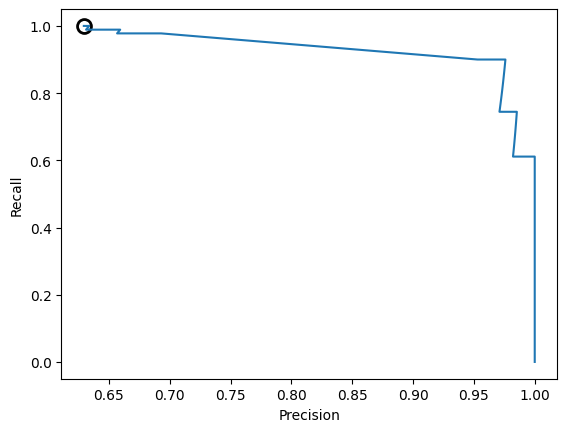

In [106]:
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall");

- Cada punto de la curva corresponde a un posible umbral de `decision_function`. Podemos ver, por ejemplo, que podemos conseguir un `recall aproximado de 0.99` con un `precision de aproximadamente 0.63`. **`El círculo negro marca el punto que corresponde a un umbral de 0, el umbral por defecto de decision_function`**. Este punto es la compensación que se elige al llamar al método `predict`. Cuanto más cerca esté la curva de la esquina superior derecha, mejor será el clasificador. `Un punto en la parte superior derecha significa alto precision y alto recall para el mismo umbral`. 

- `La curva comienza en la esquina superior izquierda, que corresponde a un umbral muy bajo, clasificando todo como clase positiva`. Al aumentar el umbral, la curva se desplaza hacia un mayor `precision`, pero también hacia un menor `recall`. Aumentando el umbral cada vez más, llegamos a una situación donde los puntos clasificados como positivos son verdaderos positivos, lo que lleva a un `precision` muy alto pero a un `recall` más bajo. Cuanto más se mantenga el modelo en un nivel alto para `precision`, mejor.

- Si observamos un poco más esta curva en particular, podemos ver que con este modelo es posible obtener un `precision` de hasta alrededor de 0.6 con un `recall` muy alto. Si queremos un `precision` mucho mayor, tenemos que sacrificar una gran cantidad de `recall`. `En otras palabras, a la izquierda, la curva es relativamente plana, lo que significa que el recall no disminuye mucho cuando necesitamos mayor precision`. Para un precision superior a 0.5, cada ganancia de `precision` nos cuesta mucho `recall`.

- Diferentes clasificadores pueden funcionar bien en diferentes partes de la curva, es decir, en `diferentes puntos de operación`. Comparemos el modelo `SVM` que hemos entrenado con un `RandomForestClassifier` entrenado en el mismo conjunto de datos. El `RandomForestClassifier` no tiene una función de decisión, sólo `predict_proba`. La función `precision_recall_curve` espera como segundo argumento una medida de certeza para la clase positiva (clase 1), por lo que pasamos la probabilidad de que una muestra sea de la clase 1, es decir, `rf.predict_proba(X_test)[:, 1]`. El umbral por defecto para `predict_proba` en la clasificación binaria es 0.5, por lo que este es el punto marcado en la curva. Por defecto, `max_features=sqrt(n_features)` en la clase `RandomForestClassifier`.

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

- `RandomForestClassifier` tiene `predict_proba`, pero no `decision_function`. El método `predict_proba()` devuelve una matriz bidimensional que contiene las `probabilidades estimadas para cada instancia y cada clase`

In [109]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

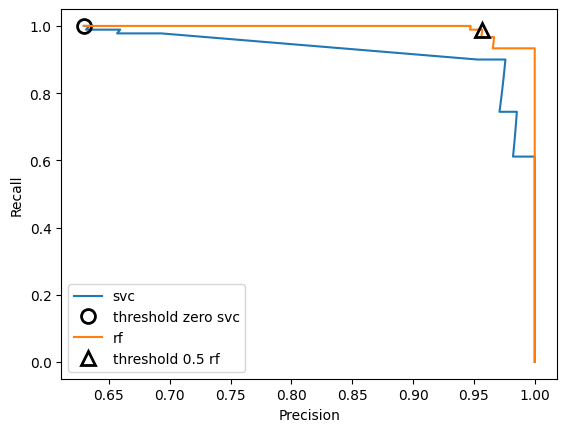

In [110]:
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', 
         markersize=10, label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best");

- En el gráfico de comparación podemos ver que el bosque aleatorio funciona mejor en los extremos, para requisitos de `recall` o de `precision` muy altos. Alrededor de cualquier nivel de precision, `RF` tiene un mejor rendimiento. Si sólo nos fijamos en el $f_{1}$-score para comparar el rendimiento general, habríamos pasado por alto estas sutilezas. El $f_{1}$-score sólo capta un punto de la curva `precision-recall`, el dado por el `umbral por defecto`.

In [111]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.973
f1_score of svc: 0.773


- La comparación de dos curvas `precision-recall` proporciona una visión muy detallada, pero `es un proceso bastante manual`. Para la comparación automática de modelos, es posible que queramos resumir la información contenida en la curva, sin limitarnos a un umbral o punto de operación. Una forma concreta de resumir la curva `precisión-recall` es **`calcular la integral o el área bajo la curva precision-recall, también conocida como precisión media`**. Para calcular la precisión media se puede utilizar la función `average_precision_score`. Como tenemos que calcular la curva ROC y considerar múltiples umbrales, el resultado de `decision_function` o `predict_proba` debe pasarse a `average_precision_score`, no el resultado de `predict`.

In [112]:
from sklearn.metrics import average_precision_score

In [113]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.997
Average precision of svc: 0.962


- Al promediar todos los umbrales posibles, vemos que el bosque aleatorio y el SVC tienen un rendimiento similar, con `RF` ligeramente por delante. Esto es bastante diferente del resultado que obtuvimos antes con $f_{1}$-score. Como la `precisión media es el área área bajo una curva que va de 0 a 1, la precisión media siempre devuelve un valor entre 0 (worst) y 1 (best)`. La precisión media de un clasificador que asigna `decision_function` al azar es la fracción de muestras positivas en el conjunto de datos.

### Características operativas del receptor (ROC) y AUC

- Existe otra herramienta que se utiliza habitualmente para analizar el comportamiento de los clasificadores a diferentes umbrales: la `receiver operating characteristics curve` o `ROC curve`. Al igual que la curva `precision-recall`, la curva ROC considera todas los posibles umbrales para un clasificador determinado, pero en lugar de informar sobre su `precision` y `recall`, muestra la tasa de falsos positivos `false positive rate (FPR)` frente a la tasa de verdaderos positivos `true positive rate (TPR)`. Recordemos que la tasa de verdaderos positivos es simplemente otro nombre para el `recall`, mientras que la `tasa de falsos positivos`, es la fracción de falsos positivos entre todas las muestras negativas, esto es, la **`proporción de negativos reales, clasificados de forma incorrecta`**.

$$
FPR=\frac{FP}{FP+TN}.
$$

- Nótese que $FPR$ se utiliza como métrica de rendimiento cuando el objetivo es `limitar el número de verdaderos negativos`. La curva ROC puede calcularse mediante la función `roc_curve`. Nótese que si $FPR\rightarrow 0$ entonces el número de $TN$ crece.

In [114]:
from sklearn.metrics import roc_curve

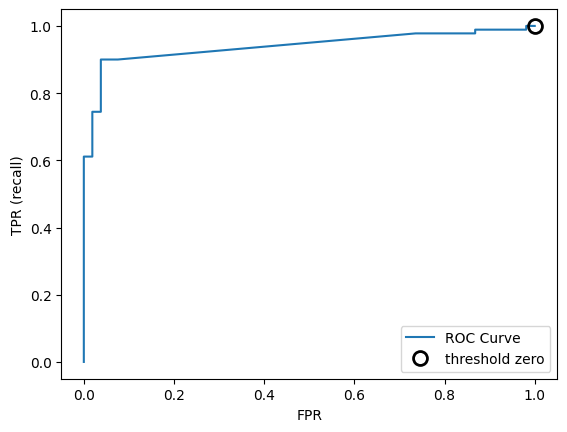

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

- Nótese que, `los valores más pequeños en el eje` $x$ `indican menos falsos positivos (FP) y más verdaderos negativos (TN). Los valores más grandes en el eje` $y$ `indican más verdaderos positivos (TP) y menos falsos negativos (FN)`. En cuanto a la curva `precision-recall`, a menudo queremos resumir la curva ROC utilizando un solo número, `el área bajo la curva (comúnmente se denomina simplemente AUC, y se entiende que la curva en cuestión es la curva ROC)`. Podemos calcular el área bajo la curva `ROC` con la función `roc_auc_score`

In [116]:
from sklearn.metrics import roc_auc_score

In [117]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.995
AUC for SVC: 0.940


In [118]:
from sklearn.metrics import roc_curve

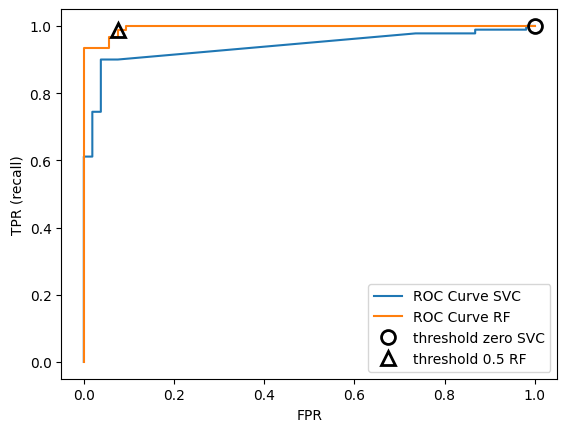

In [119]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

- Comparando el bosque aleatorio y las SVM utilizando el AUC-score, encontramos que el bosque aleatorio es ligeramente poco mejor que SVM. `Recordemos que la precisión media es el área bajo una curva que va de 0 a 1, siempre devuelve un valor entre 0 (worst) y 1 (best)`. La predicción aleatoria siempre produce un AUC de 0.5, independientemente de lo desequilibradas que estén las clases de un conjunto de datos. `Esto hace que el AUC sea una métrica mucho mejor para los problemas de clasificación desequilibrada que el accuracy`. 

- El `AUC` puede interpretarse como la evaluación del ranking de muestras positivas. Equivale a la probabilidad de que un punto elegido al azar de la clase positiva tenga un scoring más alto, según el clasificador, que de forma aleatoria toma un punto al azar de la clase negativa. Así, un AUC perfecto de 1 significa que todos los puntos positivos tienen un scoring más alto que todos los puntos negativos. `Para los problemas de clasificación con clases desequilibradas, utilizar el AUC para la selección del modelo es a menudo mucho más significativo que el uso de accuracy`. Volvamos al problema que estudiamos antes de clasificar todos los nueves del conjunto de datos de dígitos frente a todos los demás dígitos. Clasificaremos el conjunto de datos con una SVM con tres ajustes diferentes anchos de banda del kernel, `gamma`

gamma = 1.00 accuracy = 0.63 AUC = 0.51
gamma = 0.07 accuracy = 0.63 AUC = 0.94
gamma = 0.01 accuracy = 0.63 AUC = 0.95


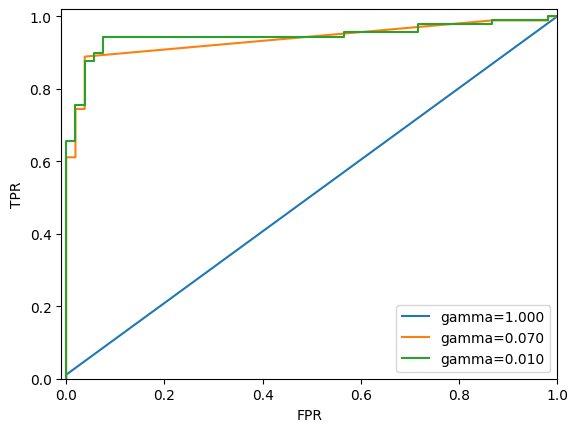

In [120]:
plt.figure()
for gamma in [1, 0.07, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best");

- Los valores de `accuracy` de los tres ajustes de `gamma` son `0.51, 0.94, y 0.95`. Con `gamma=1.0` el AUC está realmente al nivel del azar, lo que significa que el resultado de la función de decisión es tan bueno como el azar. Con `gamma=0.07`, el rendimiento mejora drásticamente hasta un AUC de 0.94. Por último, con `gamma=0.01`, obtenemos un AUC de `0.95`. `Esto significa que todos los puntos positivos están mejor clasificados que los negativos según la función de decisión`. En otras palabras, con el umbral adecuado, este modelo puede clasificar los datos perfectamente. Sabiendo esto, podemos ajustar el umbral de este modelo y obtener grandes predicciones.

- Si sólo hubiéramos utilizado `accuracy`, nunca habríamos descubierto esto. `Por este motivo, recomendamos altamente utilizar el AUC cuando se evalúan los modelos con datos desequilibrados`. Tenga en cuenta que `AUC` no utiliza el umbral por defecto, por lo que podría ser necesario ajustar el umbral de decisión para obtener resultados de clasificación útiles de un modelo con un AUC alto.

## Métricas para la clasificación multiclase

- Ahora que hemos discutido en profundidad la evaluación de las tareas de clasificación binaria, nos movemos a las métricas para evaluar la clasificación multiclase. `Básicamente, todas las métricas para clasificación multiclase se derivan de las métricas de clasificación binaria, pero promediadas sobre todas las clases`. Un `accuracy` para la clasificación multiclase se define de nuevo como la fracción de ejemplos clasificados correctamente. Y de nuevo, cuando las clases están desequilibradas, el `accuracy` no es una buena medida de evaluación. 

- Imagínese un problema de clasificación de tres clases con un 85% de puntos que pertenecen a la clase A, el 10% a la clase B y el 5% a la clase C. ¿Qué significa tener un 85% de precisión en este conjunto de datos?. En general, los resultados de la clasificación multiclase son más difíciles de entender que los resultados de la clasificación binaria. Además del `accuracy`, las herramientas habituales son la `matriz de confusión` y el `informe de clasificación` que vimos en el caso binario en la sección anterior. Apliquemos estos dos métodos de evaluación detallados a la tarea de clasificar los 10 dígitos diferentes escritos a mano en el conjunto de datos `digits`.

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


- El modelo tiene un accuracy del 95.1%, lo que ya nos dice que lo estamos haciendo bastante bien. La matriz de confusión nos proporciona algunos detalles más. Como en el caso binario, `cada fila corresponde a una etiqueta verdadera y cada columna a una etiqueta predicha`. En la siguiente figura se puede encontrar una mejor representación visual

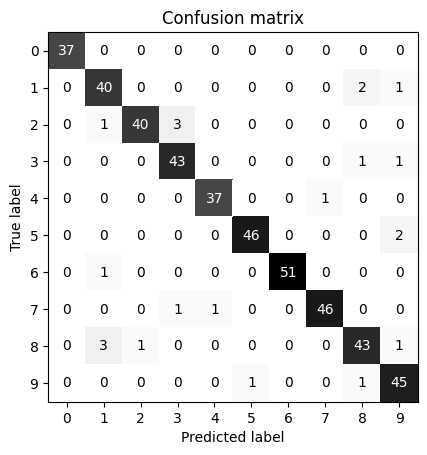

In [123]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=digits.target_names,
                                     yticklabels=digits.target_names, 
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

- `Para la primera clase, el dígito 0, hay 37 muestras en la clase, y todas estas muestras fueron clasificadas como clase 0 (no hay falsos negativos para la clase 0)`. Podemos ver el por qué todas las demás entradas de la primera fila de la matriz de confusión son 0. También podemos ver que ningún otro dígito fue clasificado erróneamente como 0, porque todas las demás entradas de la primera columna de la matriz de confusión son 0 (no hay falsos positivos para la clase 0). `Sin embargo, algunos dígitos se confundieron con otros; por ejemplo, el dígito 2 (tercera fila), tres de los cuales fueron clasificados como el dígito 3 (cuarta columna) y uno fué clasificado como el dígito 1 (segunda columna)`. También hubo un dígito 8 que se clasificó como 2 (tercera columna, novena fila). Con la función `classification_report`, podemos calcular `precision, recall` y $f$-score para cada clase.

In [124]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



- No es de extrañar que los valores para `precision` y `recall` sean un 1 perfecto para la clase 0, ya que no hay confusiones con esta clase. Para la clase 6, en cambio, el `precision` es de 1 porque ninguna otra clase se clasificó erróneamente como 6. `La métrica más utilizada para conjuntos de datos desequilibrados en el entorno multiclase es la versión multiclase del` $f$`-score`. 

- La idea detrás del $f$-score multiclase es calcular un $f$-score `binario por clase, siendo esa clase la positiva y las otras clases las negativas`. Luego, estos $f$-scores por clase se promedian utilizando una de las siguientes estrategias:

    - `El promedio "macro"` calcula los $f$-scores no ponderadas por clase. De este modo, se da el mismo peso a todas las clases, independientemente de su tamaño.
    - `El promedio "weighted"` calcula la media de los $f$-scores por clase, ponderada por su soporte. Esto es lo que se indica en el informe de clasificación.
    - `El promedio "micro"` calcula el número total de falsos positivos, falsos negativos y verdaderos positivos en todas las clases, y luego calcula `precision, recall` y $f$`-score` utilizando estos recuentos.

- Si se preocupa por igual de cada muestra, se recomienda utilizar el "micro" $f$-score; si le importa cada clase por igual, se recomienda utilizar la media macro $f$-score.

In [125]:
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))
print("Weighted average f1 score: {:.3f}".format(f1_score(y_test, pred, average="weighted")))
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))

Macro average f1 score: 0.952
Weighted average f1 score: 0.951
Micro average f1 score: 0.951


## Métricas de regresión

- La evaluación de la regresión puede hacerse con un detalle similar al que hicimos para la clasificación. Por ejemplo, analizando la sobrepredicción del objetivo frente a la subpredicción del objetivo. `Sin embargo, en la mayoría de las aplicaciones que hemos visto, el uso del $R^2$ por defecto utilizado en el score de todos los regresores es suficiente`. A veces, las `decisiones empresariales se toman sobre la base de error medio al cuadrado o el error medio absoluto, lo que podría incentivar el ajustar los modelos utilizando estas métricas`. En general, sin embargo, hemos encontrado que $R^2$ es una métrica más intuitiva para evaluar los modelos de regresión. En el curso de `Time Series Forecasting` profundizaremos en el uso de este tipo de métricas, así como tambíen: `MAE, MAPE, MSE, RMSE`.

### Uso de métricas de evaluación en la selección de modelos

- Hemos discutido muchos métodos de evaluación en detalle, y cómo aplicarlos para ciertos conjuntos de datos y un modelo. Sin embargo, `a menudo queremos utilizar métricas como AUC en la selección de modelos utilizando GridSearchCV o cross_val_score`. Afortunadamente, `scikit-learn` proporciona una manera muy simple de lograr esto, a través del argumento `scoring` que se puede utilizar en ambos `GridSearchCV` y `cross_val_score`. Es posible simplemente proporcionar una cadena que describa la métrica de evaluación que desea utilizar. Digamos, por ejemplo, que queremos evaluar el clasificador SVM en la tarea "nine vs. rest" en el conjunto de datos `digits`, utilizando el scoring AUC. El cambio del scoring por defecto (accuracy) a AUC se puede hacer proporcionando "`roc_auc`" como parámetro de scoring

- Scoring por defecto para la clasificación es `accuracy`

In [126]:
print("Default scoring: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]


- Proporcionar `scoring="accuracy"` no cambia los resultados

In [127]:
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]


- Ahora asignemos `scoring="roc_auc"` para modificar la técnica de `scoring` utilizada

In [128]:
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


- Del mismo modo, podemos cambiar la métrica utilizada para elegir los mejores parámetros en `GridSearchCV`

In [129]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

- Proporcionamos una red a manera de ilustración del punto

In [130]:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

- Utilizando el score `accuracy` por defecto

In [131]:

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


- Utilizando el scoring AUC en su lugar

In [132]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


- Cuando se utiliza `accuracy`, se selecciona el parámetro `gamma=0.0001`, mientras que cuando se utiliza el AUC se selecciona `gamma=0.01`. Accuracy score para la validación cruzada es coherente con el `accuracy` del conjunto de prueba en ambos casos. `Sin embargo, al utilizar AUC se encontró un mejor ajuste de los parámetros en en términos de AUC e incluso en términos de accuracy`. Los valores más importantes del parámetro de scoring para la clasificación son `accuracy` (por defecto); `roc_auc` para el área bajo la curva ROC; `average_precision` para el área bajo la curva de `precision-recall`; `f1, f1_macro, f1_micro` y `f1_weighted` para $f_{1}$-score binario y las diferentes variantes ponderadas. 

- En cuanto a la regresión, los valores más utilizados son `r2` para el score $R^{2}$, `mean_squared_error` para el error medio al cuadrado y `mean_absolute_error` para el error medio absoluto. Puede encontrar una lista completa de argumentos admitidos en la [documentación](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) o consultando el diccionario SCORER definido en el módulo `metrics.scorer`.

````{admonition} Resumen y conclusiones

- En esta sección hemos hablado de la validación cruzada, el grid-search y las métricas de evaluación, los pilares de la evaluación y la mejora de los algoritmos de aprendizaje automático. Las herramientas descritas en este capítulo, junto con los algoritmos descritos, son el pan de cada día para cualquier profesional del aprendizaje automático. Hay dos puntos particulares que hemos hecho en este capítulo que merecen ser repetidos, porque a menudo son pasados por alto por quienes inician investigación en este campo. 

- El primero tiene que ver con la validación cruzada. `La validación cruzada o el uso de un conjunto de pruebas nos permite evaluar un modelo de aprendizaje automático tal y como se comportará en el futuro`. Sin embargo, si utilizamos el conjunto de prueba o la validación cruzada para seleccionar un modelo o los parámetros del mismo, "agotamos" los datos de prueba, y `utilizar los mismos datos para evaluar el rendimiento de nuestro modelo en el futuro nos llevará a estimaciones demasiado optimistas`. Por lo tanto, tenemos que recurrir a una división en `datos de entrenamiento para la construcción del modelo, datos de validación para la selección del modelo y los parámetros-datos de prueba para la evaluación del modelo`. En lugar de una simple división, podemos sustituir cada una de estas divisiones con la validación cruzada. La forma más comúnmente utilizada (como se describió anteriormente) es la de entrenamiento/prueba para la evaluación, y el uso de la validación cruzada en el conjunto de entrenamiento para la selección de modelos y parámetros.

- El segundo punto tiene que ver con la importancia de la métrica de evaluación o la función de scoring de evaluación utilizada para la selección y la evaluación del modelo. La teoría de cómo tomar decisiones empresariales a partir de las predicciones de un modelo de machine learning, se sale de los alcances del curso (ver por ejemplo [Data Science for Business](https://www.oreilly.com/library/view/data-science-for/9781449374273/)). Sin embargo, rara vez el objetivo final de una tarea de aprendizaje automático es la construcción de un modelo con una gran precisión (accuracy). Asegúrese de que la que la métrica que elija para evaluar y seleccionar un modelo sea un buen sustituto de aquello para lo que se utilizará el modelo. 

- `En realidad, los problemas de clasificación rara vez tienen clases equilibradas, y a menudo los falsos positivos y los falsos negativos tienen consecuencias muy diferentes`. Asegúrese de entender cuáles son estas consecuencias y elija un método de evaluación en consecuencia. Las técnicas de evaluación y selección de modelos que hemos descrito hasta ahora son las herramientas más importantes en la caja de herramientas de un científico de datos. `El grid-search y la validación cruzada, tal y como la hemos descrito en esta sección, sólo pueden aplicarse a un único modelo supervisado`. Sin embargo, ya hemos visto que muchos modelos requieren un preprocesamiento y que en algunas aplicaciones, como por ejemplo, el reconocimiento de caras en imágenes, puede ser útil extraer una representación de los datos. En la siguiente sección, presentaremos la clase `Pipeline`, que nos permite utilizar grid-search y validación cruzada en cadenas complejas de algoritmos.
````